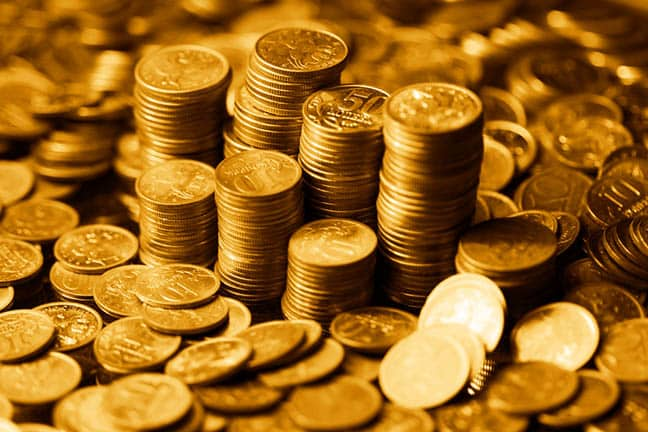

* In the realm of precious metals, gold stands as an enduring symbol of value and prosperity. This dataset delves into the intricate journey of 24-carat gold prices, meticulously recorded on a monthly basis spanning the extensive timeline from 1979 to 2022. The price values, presented in terms of cost per gram, provide a granular perspective on the dynamic nature of the gold market over the decades.

* Sourced from Kaggle, this dataset encapsulates the monthly frequency of observations allows for a nuanced analysis of trends, patterns, and significant events that have shaped the value of gold during this time period.

* This exploration aims to uncover underlying trends, identify patterns.Through statistical analysis and data visualization, this study seeks to shed light on the broader implications of gold price fluctuations and their relevance in understanding the dynamics of global finance. By embarking on this analytical journey, we embark on a quest to decipher the story behind the numbers, exploring the past to glean insights into potential future trends."

In [1]:
# Let's import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant


from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression


import datetime

import tensorflow as tf
from tensorflow.keras import Model,Sequential
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError,RootMeanSquaredError
from tensorflow.keras.layers import *
from keras.backend import clear_session
from keras.regularizers import l2

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Setting the figure size constant for all plots.
plt.rcParams['figure.figsize'] = 15,8

In [3]:
# Loading the data using pandas read_csv
gold = pd.read_csv('gold_price.csv',usecols=['Date','Indian rupee (INR)'])
gold

Date  Indian rupee (INR)
0    1979-01-31           59.183737
1    1979-02-28           64.677014
2    1979-03-30           62.377592
3    1979-04-30           64.722668
4    1979-05-31           72.448814
..          ...                 ...
523  2022-08-01         4513.312158
524  2022-09-01         4336.447686
525  2022-10-01         4405.902944
526  2022-11-01         4538.351160
527  2022-12-01         4759.873018

[528 rows x 2 columns]

In [4]:
# Basic Information about data-set :
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                528 non-null    object 
 1   Indian rupee (INR)  528 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.4+ KB


#### Interpretation :
    * Total Number of rows : 528
    * Total Number of features : 2
    * Number of missing values : 0
    * Note : The data type of Date feature should be changed to 'Datetime64[ms]'

In [5]:
# Converting the data-type of the feature 'Date'
gold['Date'] = gold['Date'].astype('datetime64[ms]')

In [6]:
# Interactive line plot using Plotly
fig = px.line(gold, x='Date', y='Indian rupee (INR)', title='Interactive Gold Price Trends Over Time')
fig.show()

### Interpretation :

#### Set the date feature as index for further analysis.

In [7]:
gold = gold.set_index('Date')
gold.head(5)

Indian rupee (INR)
Date                          
1979-01-31           59.183737
1979-02-28           64.677014
1979-03-30           62.377592
1979-04-30           64.722668
1979-05-31           72.448814

#### Gold Price Over-time :

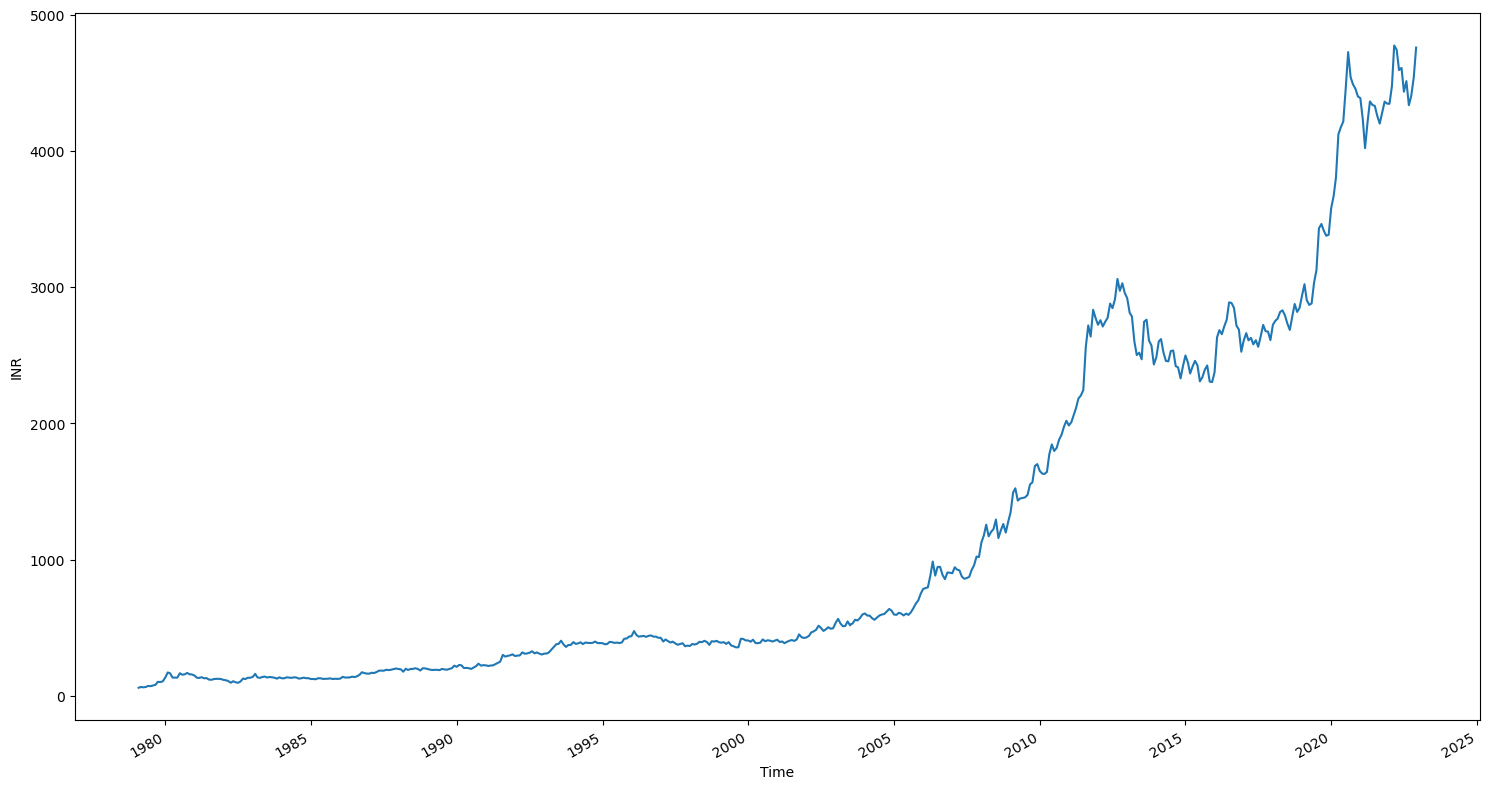

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(gold.index,gold['Indian rupee (INR)'])
ax.set_xlabel('Time')
ax.set_ylabel('INR')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

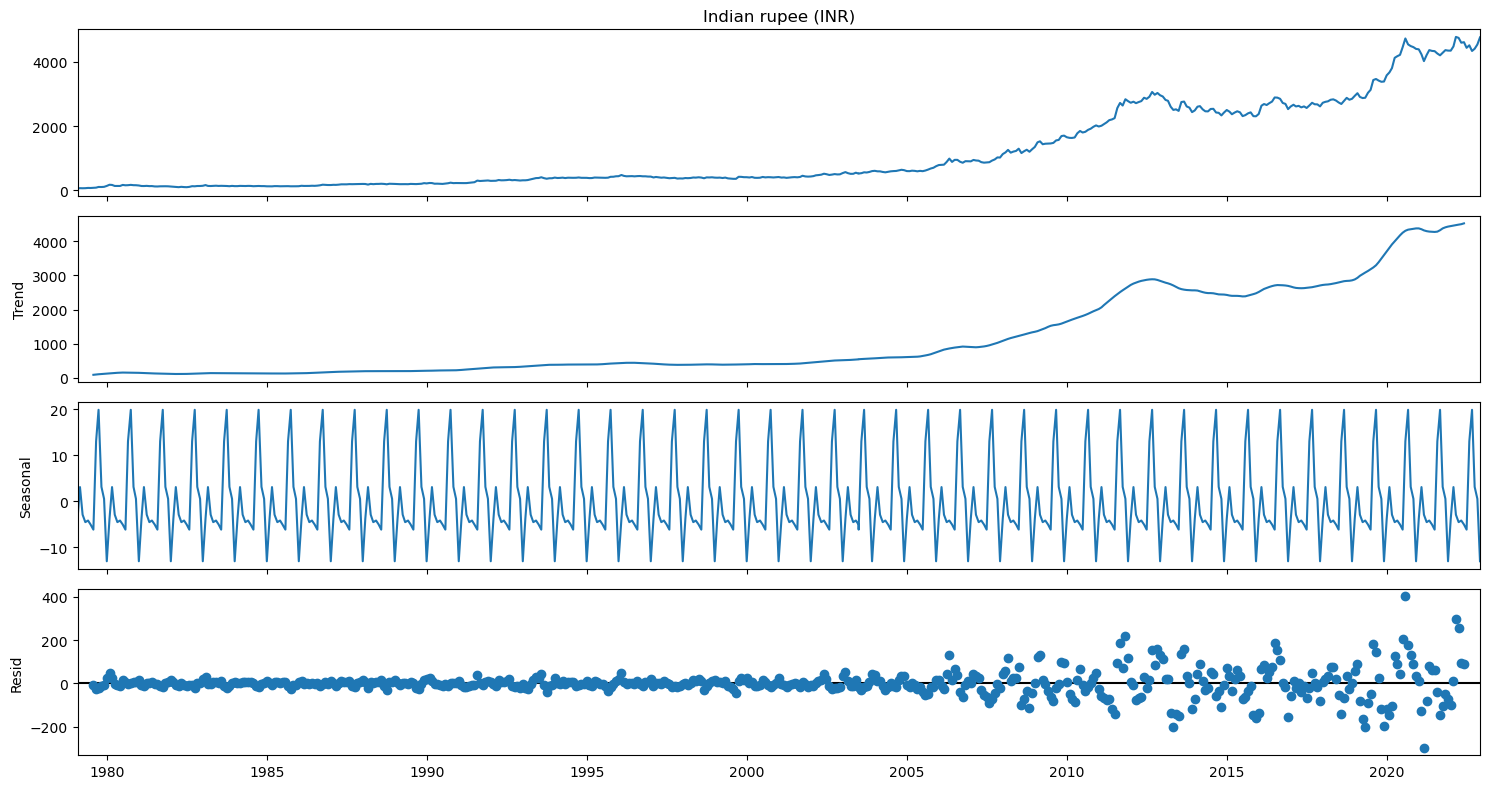

In [9]:
sd = seasonal_decompose(gold['Indian rupee (INR)'],period=12)
sd.plot();

* We can see a positive trend over the years for per gram of gold.
* Seasonal pattern presents in the data.This could be weekly (or) monthly (or) yearly seasonal pattern.
* The residual stays constant in the earlier period up-to 2005 , but started to go abrupt after that,denoting the trend and seasonal component does not have much to play in the later periods.
* This is true for all the stock price,fuel energy price, currency rate because of the numerous factors involved.

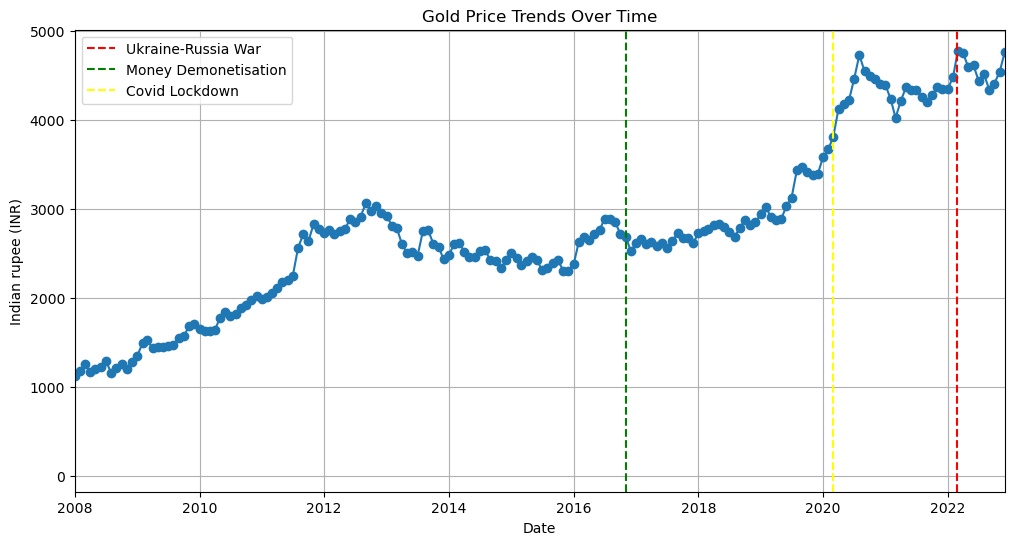

In [10]:
# Creating a subset of data during a global event
ukraine_russia_war_date = pd.to_datetime('2022-02-24')
Money_demonetisation = pd.to_datetime('2016-11-01')
covid_lockdown = pd.to_datetime('2020-03-01')
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(gold.index, gold['Indian rupee (INR)'], marker='o')
plt.axvline(x=ukraine_russia_war_date, color='red', linestyle='--', label='Ukraine-Russia War')
plt.axvline(x=Money_demonetisation, color='green', linestyle='--', label='Money Demonetisation')
plt.axvline(x=covid_lockdown, color='yellow', linestyle='--', label='Covid Lockdown')
plt.title('Gold Price Trends Over Time')
plt.xlabel('Date')
x_min = pd.to_datetime('2008-01-01')
x_max = pd.to_datetime('2022-12-01')
plt.xlim(x_min,x_max)
plt.ylabel('Indian rupee (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# The factors that affect and drive gold price are numerous and also global.
# It would be a difficult job to forecast a gold price, because you don't have all the factors that influences the rise and fall of gold price

###  Covid lockdown period :

In [12]:
# Covid Lockdown has been happened on and off from march to august .
# Let's calculate the gold price change in percentage during that period .

In [13]:
((gold.loc['2020-08-01'][0] - gold.loc['2020-03-01'][0]) / gold.loc['2020-03-01'][0]) * 100

24.255026363791576

In [14]:
# The gold price has increased by 24 % from march to august in the span of 5 months.
# This tells us that the gold price is heavily affected by global events.
# This makes our job to study the gold prices trends and seasonal pattern because the most of the increase and decrease in price might be triggered by some events in the history.

# Naive prediction as Baseline :

## What is naive prediction ?
* By looking at the time series data components , we make naive assumptions about the data and cross check data with that assumption using simplest models or forecasting methods without any feature engineering or complex models.
* For our data , one simple statistics we can use as naive prediction is nothing but the arithmetic mean.
* Before making prediction , how do we decide that the predictions we made are legitimate? One simple intuitive idea is that split the data as training and validation or test data , so that we can build or train our machine on training data and checks its knowledge using validation dataset.
* One thing to keep in mind is that , we are going to work with a *sequential* data. A sequential data is a data where each data points is dependent on each other. Here, the idea is that the future data's are a function of past data.

In [15]:
# Splitting the data
train = gold.iloc[:-12,:]
test = gold.iloc[-12:,:]

In [16]:
train # Trainig data from 1979-01(JAN)-01 to 2021-12(DEC)-01. A total of 43 years

Indian rupee (INR)
Date                          
1979-01-31           59.183737
1979-02-28           64.677014
1979-03-30           62.377592
1979-04-30           64.722668
1979-05-31           72.448814
...                        ...
2021-08-01         4257.749089
2021-09-01         4201.363109
2021-10-01         4279.013592
2021-11-01         4362.544447
2021-12-01         4348.317742

[516 rows x 1 columns]

In [17]:
test # Test data from 2022-01(JAN)-01 to 2022-12(DEC)-01. A total of 12 months

Indian rupee (INR)
Date                          
2022-01-01         4346.771291
2022-02-01         4478.029929
2022-03-01         4774.749169
2022-04-01         4743.951969
2022-05-01         4594.534589
2022-06-01         4610.298100
2022-07-01         4435.500921
2022-08-01         4513.312158
2022-09-01         4336.447686
2022-10-01         4405.902944
2022-11-01         4538.351160
2022-12-01         4759.873018

In [18]:
forecasted_mean = np.mean(train['Indian rupee (INR)'])
forecasted_mean

1094.3193636148255

In [19]:
def rmse(True_labels,Prediction):
    return np.sqrt(mean_squared_error(True_labels,Prediction))

In [20]:
forecast = pd.DataFrame()
forecast.index = test.index
forecast['forecast'] = forecasted_mean

In [21]:
rmse(test['Indian rupee (INR)'],forecast['forecast'])

3453.6883899558966

In [22]:
# The forecasted value is deviated from the actual value by ± 3453 rupees.

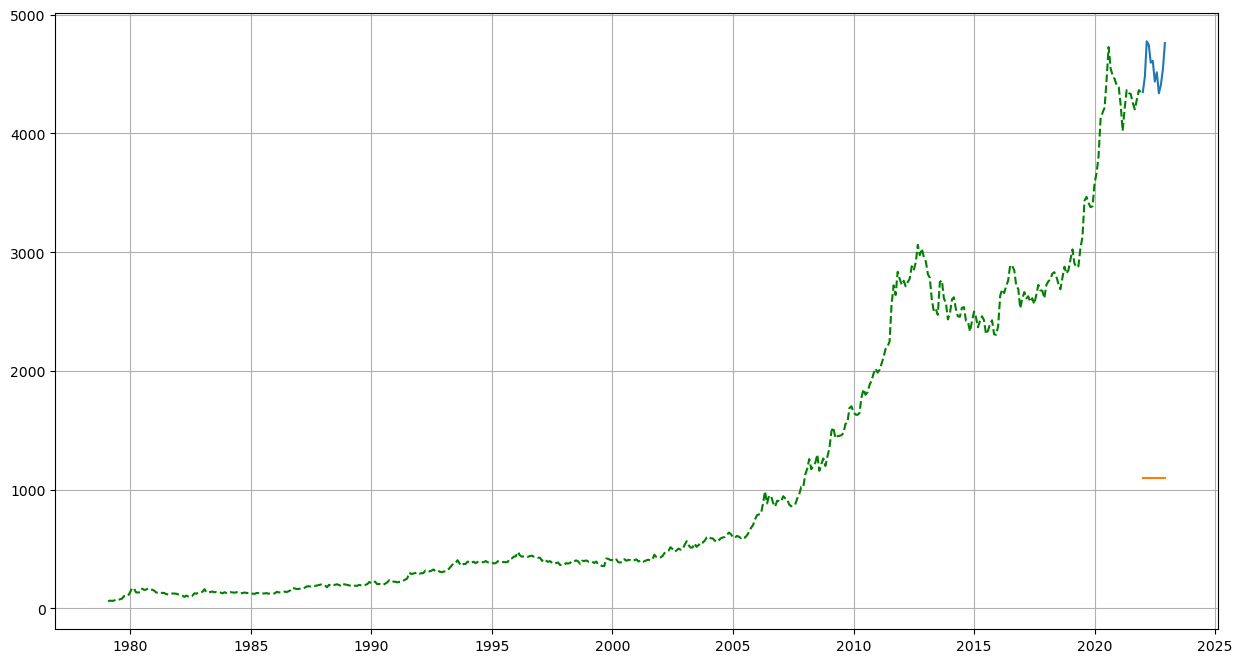

In [23]:
# lets visualize this
fig,ax = plt.subplots()
ax.plot(train.index,train['Indian rupee (INR)'],'g--')
ax.plot(test.index,test['Indian rupee (INR)'])
ax.plot(forecast.index,forecast.forecast)
plt.grid()

* Its evident that the long past values don't have much to say about future values.
* Using long past values is not helpful predicting future values here.

## What's next ?
* Well, we can't use long past values to predict the future. Then. how about using the very recent values to predict future.
* This step should be better than our previous method.
* Note, this too a naive forecast method.
* Since we are predicting 331 days of gold price , lets take the last 331 data points of observed values and use it as a forecast value and compare it with our previous method of arithmetic mean.

In [24]:
forecast['forecast'] = train.iloc[-12:,0].values

In [25]:
rmse(test['Indian rupee (INR)'],forecast['forecast'])

335.73716321059464

* The predicted values are deviated from the actual values by ± 335 rupees.
* This shows how much the most recent values has been influencing the future values.

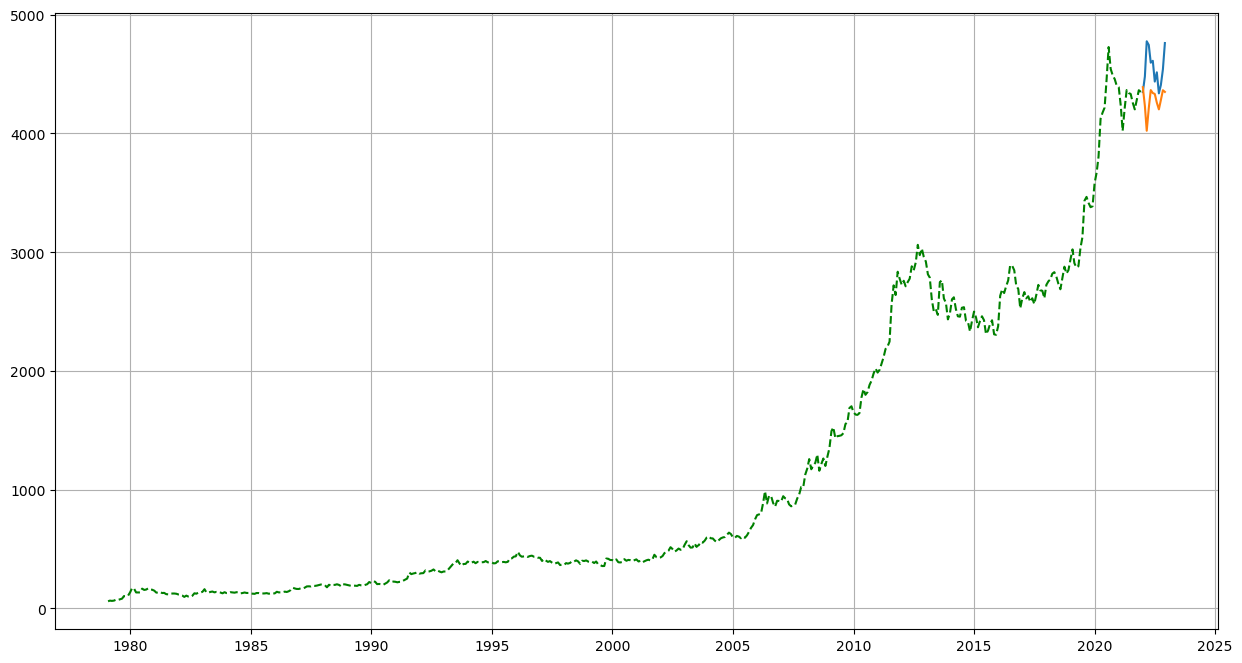

In [26]:
# lets visualize this
fig,ax = plt.subplots()
ax.plot(train.index,train['Indian rupee (INR)'],'g--')
ax.plot(test.index,test['Indian rupee (INR)'])
ax.plot(forecast.index,forecast.forecast)
plt.grid()

###### As you can see the predicted values are off by small marign compared to the observed values.

In [27]:
forecasted_mean = np.mean(train.iloc[-12:,0].values)
forecast['forecast'] = forecasted_mean

In [28]:
rmse(test['Indian rupee (INR)'],forecast['forecast'])

305.55800009589706

* Now the rmse value is even lower than the previous value.
* The predicted values are only off by ± 305 rupees.
* So far, this is the best method to predict the future values.

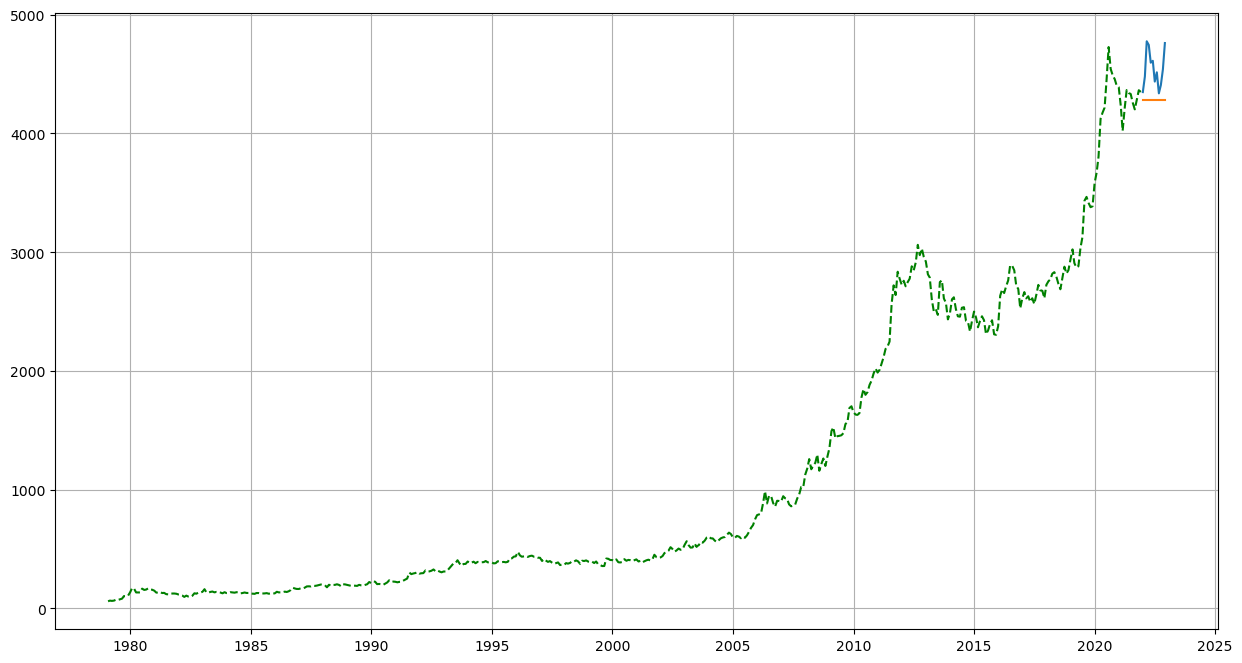

In [29]:
# lets visualize this
fig,ax = plt.subplots()
ax.plot(train.index,train['Indian rupee (INR)'],'g--')
ax.plot(test.index,test['Indian rupee (INR)'])
ax.plot(forecast.index,forecast.forecast)
plt.grid()

##  Is there a way to improve our forecasting accuracy ?

* Remember, all the above methods are used to create baseline models. A baseline model is the simplest model which helps us to compare the more complex models performance with baseline models to identify the better-performing model.
* There will be special situations in time series , where we can only able to use naive forecast methods because of the nature of the time series data that was observed.
* The data moves in random process and makes it difficult for the statistical models to learn useful information.
* This is what we call as *'Random walk'*.

## Going on a random walk

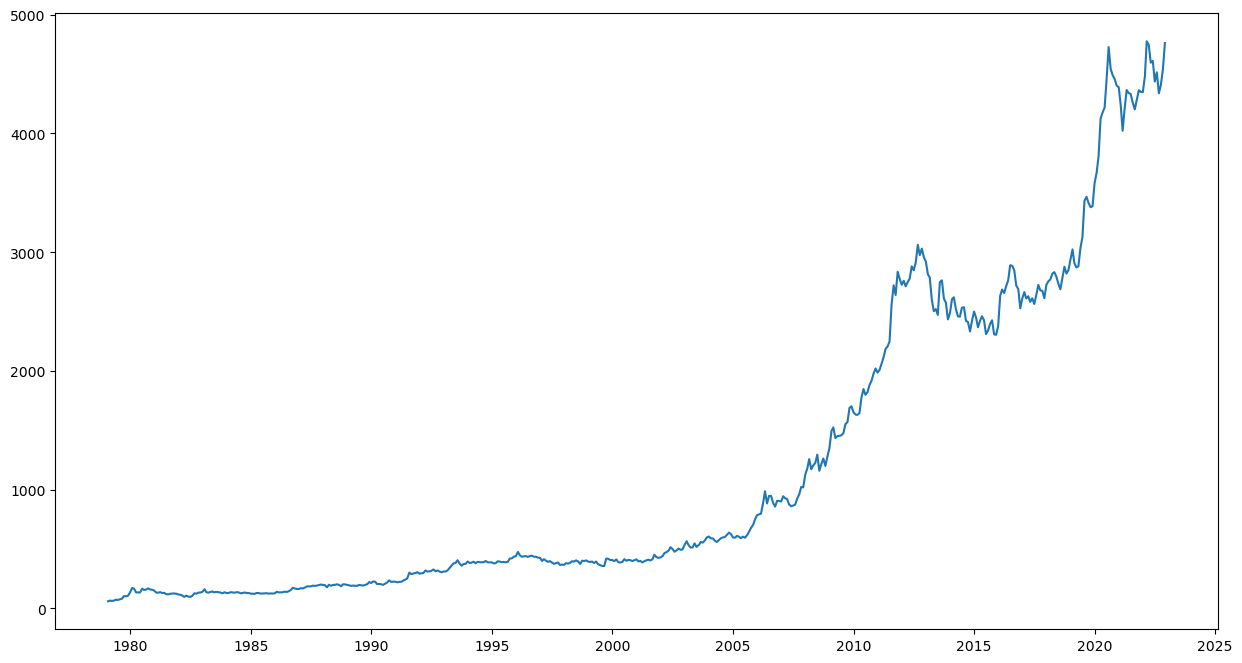

In [30]:
plt.plot(gold.index,gold['Indian rupee (INR)']);

* Random process defines as the equal chances of going up and down by a random number.
* By looking at the above plot makes you wonder about it.There are lot of sudden changes in the overall trend.
* After 2010, there has been a random up and down in the prices of per gram gold.
* To determine our time series can be approximate by the random process, our data's first differencing should be stationary and uncorrelated.

## ADF TEST :

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
adf_statistics,p_value,_,_,critical_vaue,_ = adfuller(gold['Indian rupee (INR)'])

In [33]:
adf_statistics

1.9920549302179302

In [34]:
p_value

0.9986625380810772

In [35]:
first_order_diff = pd.DataFrame(np.diff(gold['Indian rupee (INR)'],n=1),index = gold.index[1:].values) # N parameter denotes the how many times the data should be differenced.

In [36]:
first_order_diff.rename({0:'INR'},axis=1,inplace=True)
first_order_diff

INR
1979-02-28    5.493277
1979-03-30   -2.299421
1979-04-30    2.345075
1979-05-31    7.726146
1979-06-29   -2.020996
...                ...
2022-08-01   77.811237
2022-09-01 -176.864472
2022-10-01   69.455258
2022-11-01  132.448216
2022-12-01  221.521859

[527 rows x 1 columns]

In [37]:
# Perform the ADF test:
adf_statistics,p_value,_,_,critical_vaue,_ = adfuller(first_order_diff['INR'])

In [38]:
adf_statistics # large negative number

-4.084335186538705

In [39]:
p_value # lesser than 0.05

0.0010279073863517583

* The p-values is lesser than 0.05 , suggests that it reject the null hypothesis.
* Now , lets declare our time series has a stationary properties.

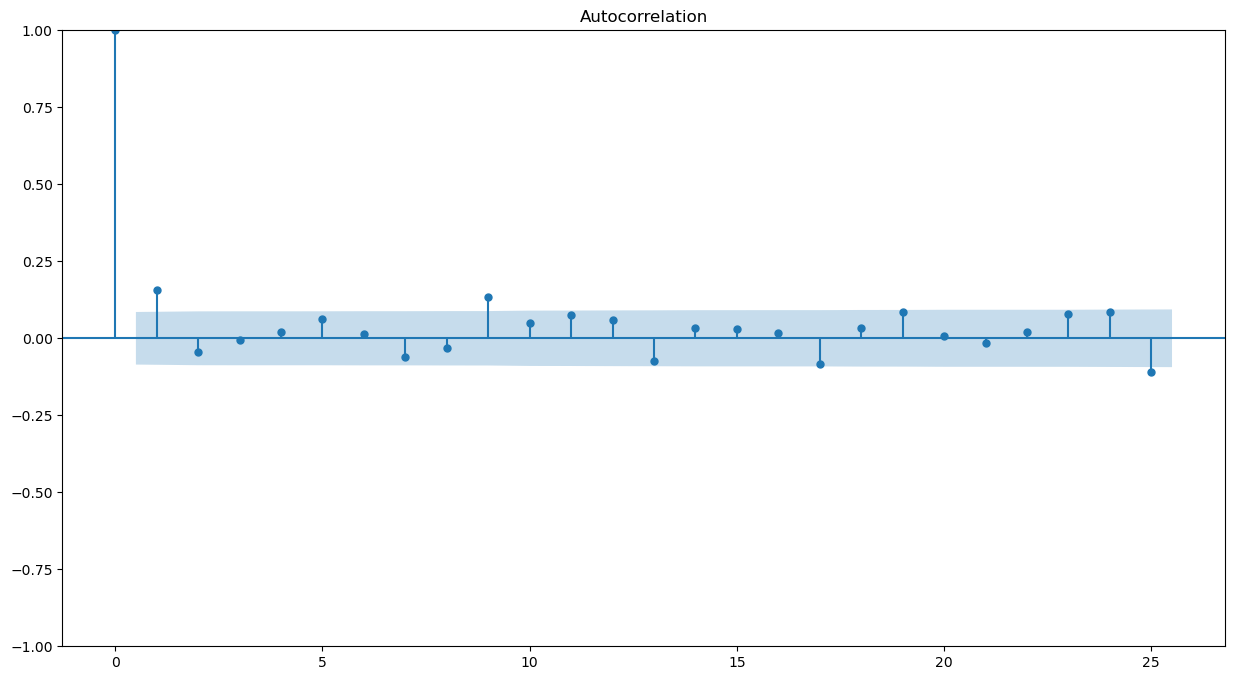

In [40]:
# Lets check the properties of Auto-correlation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(first_order_diff,lags=25);

In [41]:
# The first co-efficient value that comes out of the confidence interval bound area and its visible there is a sinusoidal
# pattern presents in the plot.
# Because of the clear pattern , we don't approximate our data by random walk process.
# The job of auto - correlation plot is to study the linear relationship between each value with its previous values.
# There is seen to be some kind of relationship or influences or correlation between the time series data.

#  Forecasting using Statistical Models :

##  Moving Average :

* A moving average is a linear combination of mean of the series along with current timestep error term(white noise) plus the "q" number of previous timesteps error terms.
* yt = µ + ϵt + θ1ϵt–1 + θ2ϵt–2 +⋅⋅⋅+ θqϵt–q
* The magnitude of the past error on the present value will be quantified by the phi(θq) value for each timestep.
* The order "q" is denotes the number of timesteps (past error terms) that affect the present value.

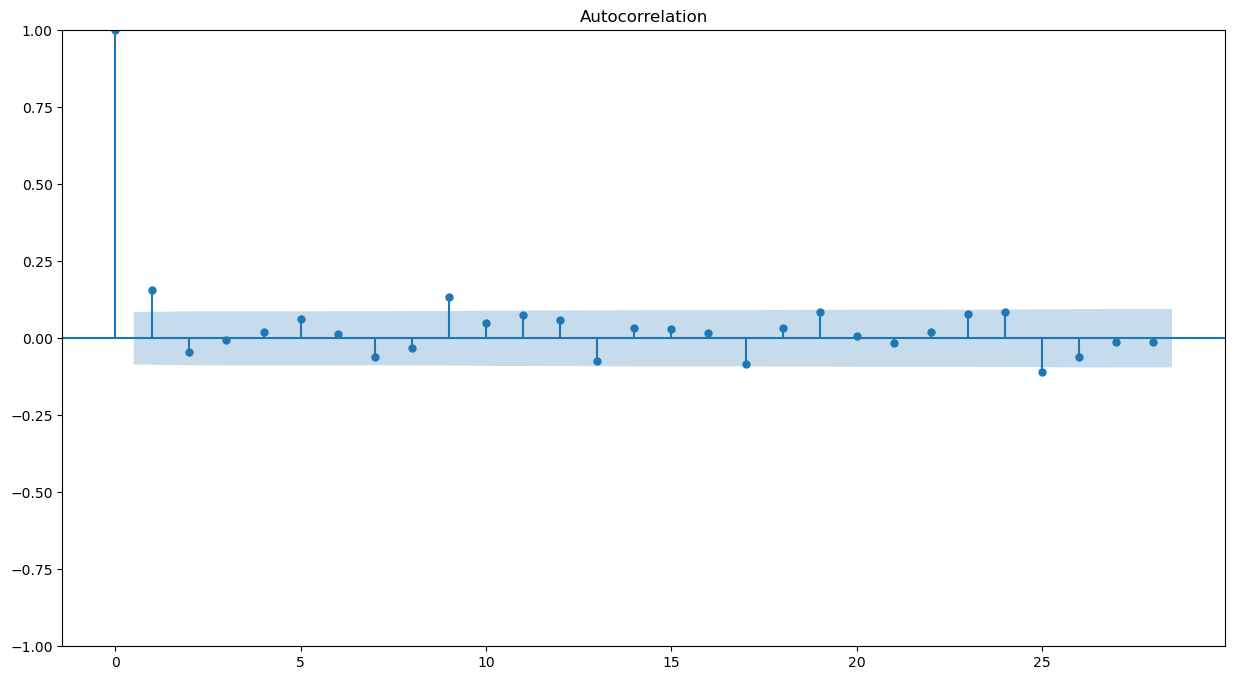

In [42]:
# Let's find the "q" value using ACF Plot:
from statsmodels.graphics.tsaplots import plot_acf
# Note : We use the differenced series data in moving average model, because moving average statistical models assumes that time series has a stationary property.
plot_acf(first_order_diff['INR']);

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon

    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value

    elif method == 'ma':
        pred_MA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(0, 0, 1))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        return pred_MA

In [44]:
train_diff = first_order_diff[:-12]
test_diff = first_order_diff[-12:]

In [45]:
TRAIN_LEN = train_diff.shape[0]
HORIZON = test_diff.shape[0]
WINDOW = 1 # How many timesteps should we predict for each timestep

In [46]:
pred_mean = rolling_forecast(df= first_order_diff,train_len=TRAIN_LEN,window=WINDOW,horizon = HORIZON,method = 'mean')
pred_last = rolling_forecast(df= first_order_diff,train_len=TRAIN_LEN,window=WINDOW,horizon = HORIZON,method = 'last')
pred_ma = rolling_forecast(df= first_order_diff,train_len=TRAIN_LEN,window=WINDOW,horizon = HORIZON,method = 'ma')

In [47]:
pred_df = test_diff.copy()
pred_df.loc[:,'pred_mean'] = pred_mean
pred_df.loc[:,'pred_lastvalue'] = pred_last
pred_df.loc[:,'pred_ma'] = pred_ma

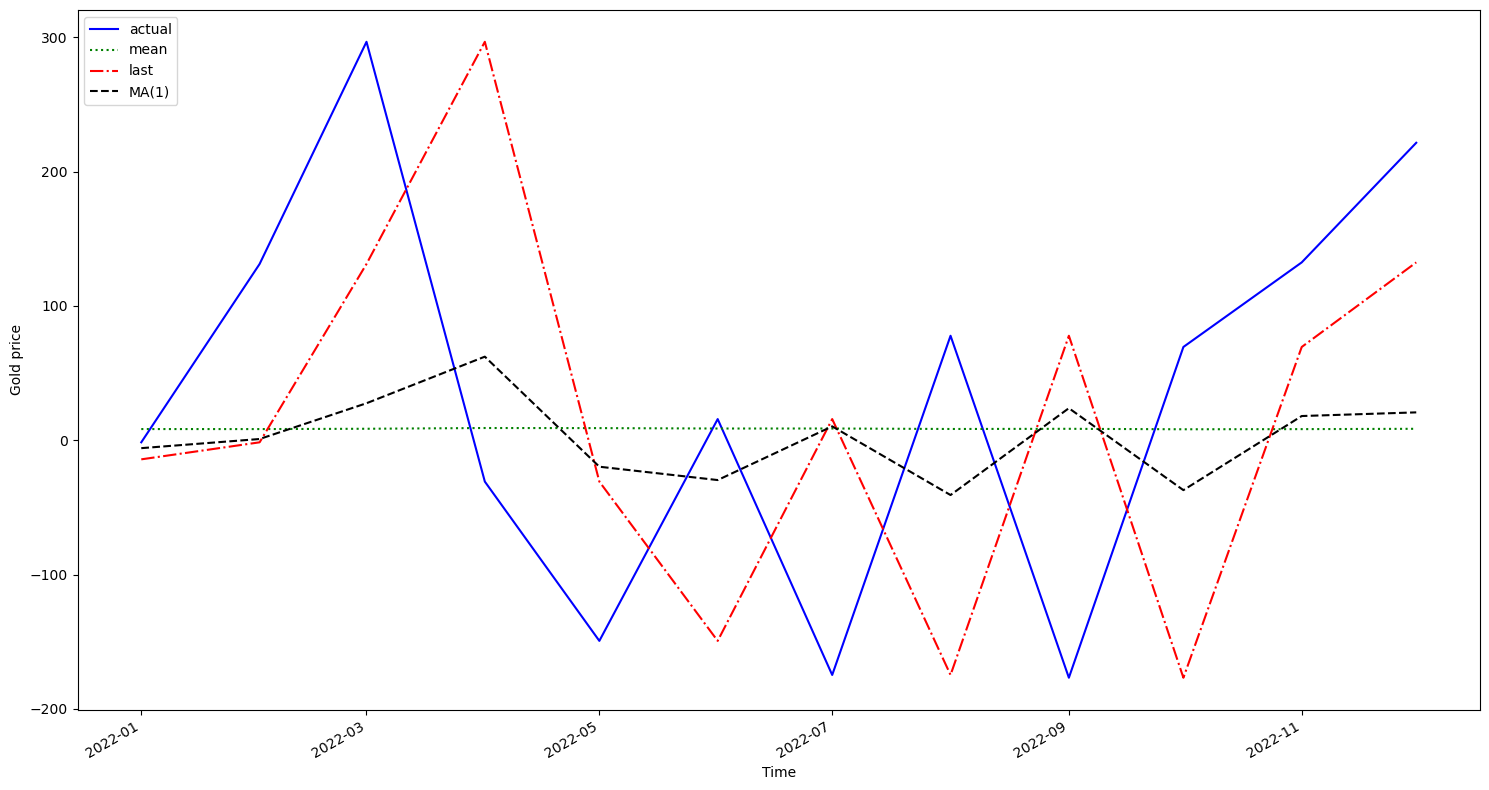

In [48]:
fig, ax = plt.subplots()
ax.plot(pred_df['INR'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_lastvalue'], 'r-.', label='last')
ax.plot(pred_df['pred_ma'], 'k--', label='MA(1)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

In [49]:
# Reverse the differencing :

In [50]:
df1 = gold.copy()
df1['pred_gold_price_ma'] = pd.Series()
df1['pred_gold_price_last_value'] = pd.Series()
df1['pred_gold_price_mean'] = pd.Series()

df1['pred_gold_price_ma'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_ma'].cumsum()
df1['pred_gold_price_last_value'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_lastvalue'].cumsum()
df1['pred_gold_price_mean'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_mean'].cumsum()

In [51]:
rmse(df1['Indian rupee (INR)'][-12:],df1['pred_gold_price_ma'][-12:])

219.7361215440528

In [52]:
# You can witness that the predictions do not resembles the characteristics of actual value.
# This is because the auto - regressive is at the play.

* When you see sinusoidal pattern in acf plot , then you must know that the auto-regressive is at play.
* Let's try AR(P) , to find value for p we might use partial auto correlation plot
* Whats the difference between auto correlation and partial auto correlation ?
    * The answer is very simple, auto correlation studies the correlation between current value with all the previous values which leads to study the indirect relationship with current value as well.
    * Partial auto correlation technique only study and identify the direct relationship between a current value and a         previous values. Leads to a more robust study of correlation.

##  Auto - Regressive Process (AR) :
        * An Auto-regressive process is also denoted as (AR) model with p order.
        * Formula :
        
         y(t) = C(constant) + Alpha(t-1) * Value(t-1) + Alpha(t-2) * Value(t-2) + .... + Alpha(t-p) * Value(t-p) + error(t)
         
        * The formula states that the AR model is linear combination of constant , present error term and past values of order p.The influence of past values on the present value will be denoted by Alpha(t-p).

In [53]:
# Since we found the sinusoidal pattern in acf plot , lets use pacf plot to find the order of p and perform ar(p) model.
from statsmodels.graphics.tsaplots import plot_pacf

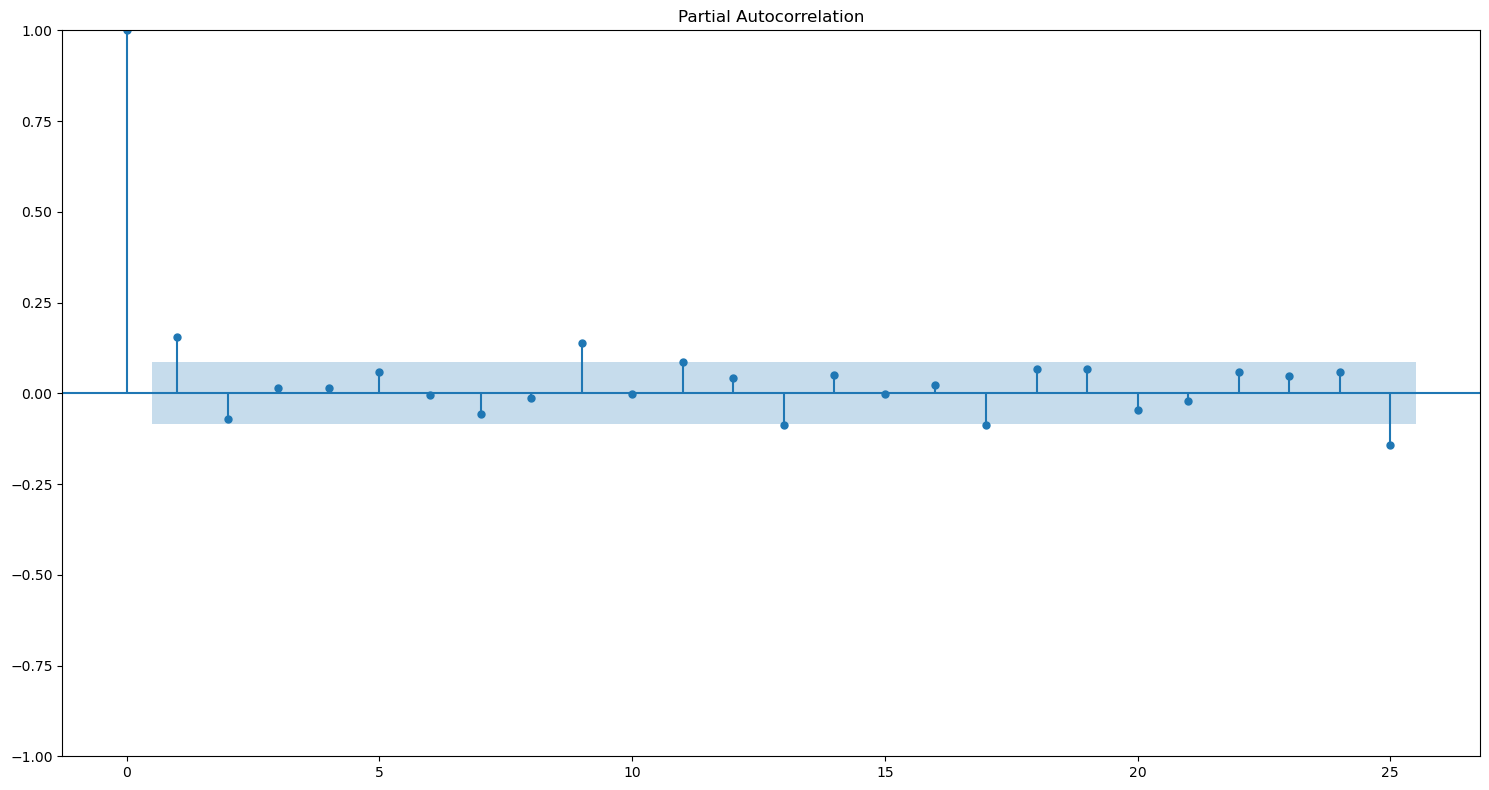

In [54]:
plot_pacf(first_order_diff['INR'],lags=25)
plt.tight_layout()

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon

    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value

    elif method == 'ar':
        pred_MA = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(1,0, 0,))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        return pred_MA

In [56]:
pred_mean = rolling_forecast(df= first_order_diff,train_len=TRAIN_LEN,window=WINDOW,horizon = HORIZON,method = 'mean')
pred_last = rolling_forecast(df= first_order_diff,train_len=TRAIN_LEN,window=WINDOW,horizon = HORIZON,method = 'last')
pred_ar = rolling_forecast(df= first_order_diff,train_len=TRAIN_LEN,window=WINDOW,horizon = HORIZON,method = 'ar')

In [57]:
pred_df = test_diff.copy()
pred_df.loc[:,'pred_mean'] = pred_mean
pred_df.loc[:,'pred_lastvalue'] = pred_last
pred_df.loc[:,'pred_ar'] = pred_ar

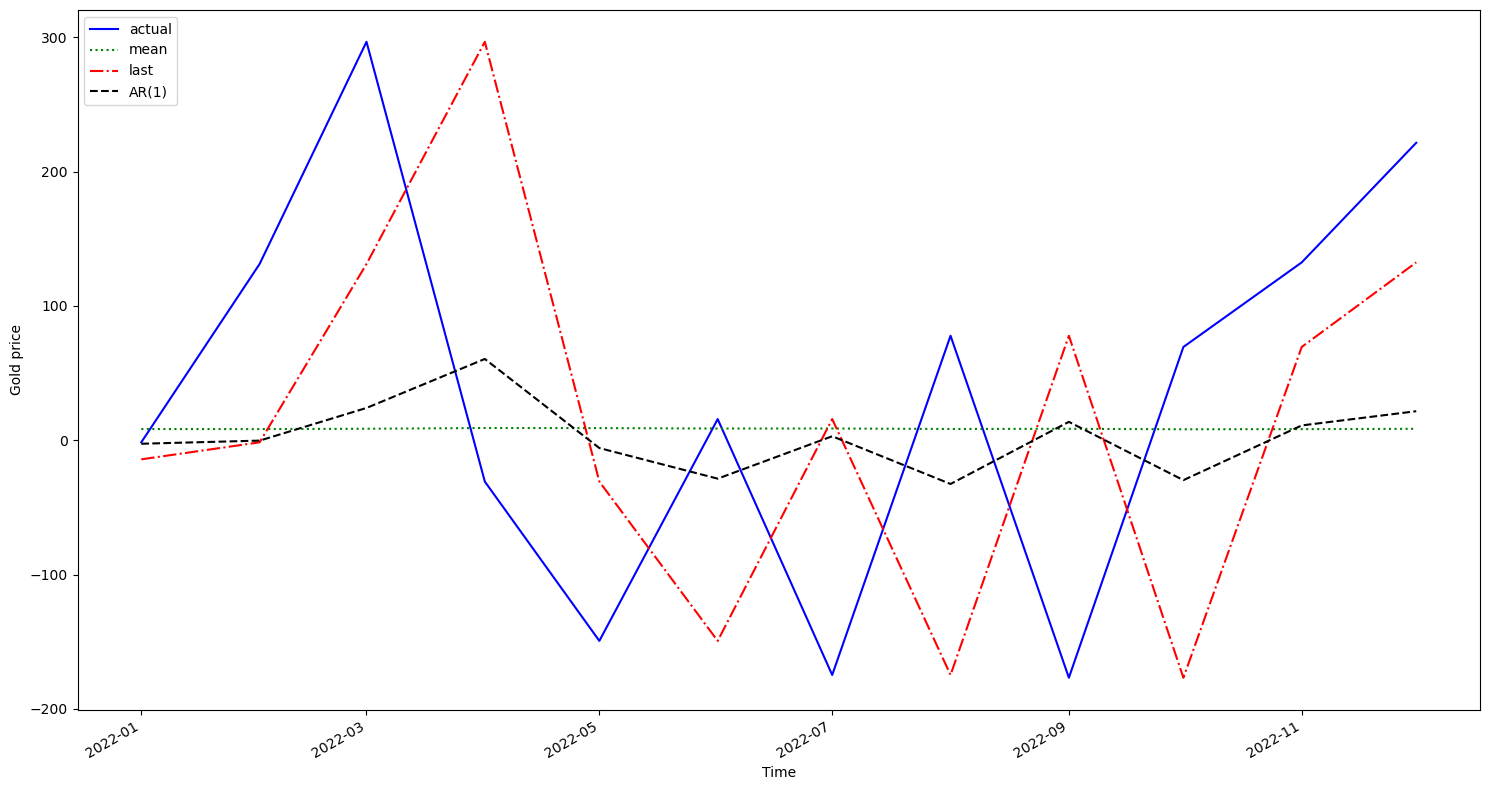

In [58]:
fig, ax = plt.subplots()
ax.plot(pred_df['INR'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_lastvalue'], 'r-.', label='last')
ax.plot(pred_df['pred_ar'], 'k--', label='AR(1)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

In [59]:
df1 = gold.copy()
df1['pred_gold_price_ar'] = pd.Series()
df1['pred_gold_price_last_value'] = pd.Series()
df1['pred_gold_price_mean'] = pd.Series()

df1['pred_gold_price_ar'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_ar'].cumsum()
df1['pred_gold_price_last_value'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_lastvalue'].cumsum()
df1['pred_gold_price_mean'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_mean'].cumsum()

In [60]:
rmse(df1['Indian rupee (INR)'][-12:],df1['pred_gold_price_ar'][-12:])

216.71297020025534

* Whoaa!! what do we have here??
* Isn't the above plot is much similar to acf plot.
* ACF,PACF plot exhibit the similar **sinusoidal** pattern.
* What is it mean then ?
    * This means the we are dealing with much more complex time series data which requires much more complex models to study it.
    * We can't use pure moving average or pure auto-regressive models.
    * Now , we take much more complex model such as **ARMA(P,Q)** , a combination of moving average and auto-regressive model.
    * Since, ACF and PACF plot makes difficult for us to find the value of q and p , we are going to define a general procedure which helps us to find the optimal q and p value with the help of Akaike Information criterion (AIC).
    * Then we must evaluate the models performance using residual analysis by studying the correlogram, Q-Q plot and density plot of model's residual whether they resemble the white noise.If do then we use ARMA(P,Q) model.

## ARMA(P,Q):

     * ARMA(P,Q) is a combination of moving average(q) and auto-regressive(p) to model a complex time series data.
     * The Auto-regressive moving average is also denoted as ARMA(P,Q) . Its a linear combination of constant(C), mean(µ) of the series, past values(yt–1) until order of p along with phi(φ) parameter which reflects the influence of past values over current time step , error of current time-step (ϵt) , and also error of past values(ϵt–1) of order q along with theta(θ) reflecting the influence of past values errors.
     * Formula :
     
     * y(t) = C + φ1yt–1 + φ2yt–2 +⋅⋅⋅+ φpyt–p + µ + ϵt + θ1ϵt–1 + θ2ϵt–2 +⋅⋅⋅+ θqϵt–q
     * Note , when q = 0 or p = 0 , then what we have is either pure auto-regressive or pure moving average.
    

In [61]:
# Splitting the data
train_diff = first_order_diff.iloc[:-12,:]
test_diff = first_order_diff.iloc[-12:,:]

In [62]:
# A General Working Model to find order of p , q and even for seasonal effects.
from itertools import product
q = range(0,12,1)
p = range(0,12,1)
order_list = list(product(p,q))
order_list[:5]

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]

In [63]:
# Function to find the p,q values using aic criterion
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [64]:
def optimize_ARMA(endog : Union[pd.Series,list],order_list :list) -> pd.DataFrame:
    # Initializa an empty list to store the results for each order of (P,Q) and its corresponding AIC Score.
    results = []
    # To iterate the each order in order_list , The tqdm_notebook wraps around the for loop and displays a progress bar.
    for order in tqdm_notebook(order_list):
        try :
            # Fitting ARMA (P,Q) model using SARIMAX function.
            # We use Sarimax function because of its flexibilty to handle different problems.
            # We mention Simple_differencing = False to prevent performing differencing operation on the series
            # Disp = False prevents the model from printing convergence messages on the console
            model = SARIMAX(endog,order = (order[0],0,order[1]),simple_differencing=False).fit(disp = False)
        except:
            continue
        aic = model.aic # store the aic score for the order.
        results.append([order,aic])# Appending the score to result list along with its order

    results_df = pd.DataFrame(results)
    results_df.columns = ['(P,Q)','AIC']
    # Sort the values in the results_df by AIC column.
    result_df = results_df.sort_values(by = 'AIC',ascending=True).reset_index(drop=True) # Sort the DataFrame in ascending order of AICvalues. The lower the AIC, the better the model.
    return result_df

result_df = optimize_ARMA(train_diff,order_list=order_list)
result_df[:5]

In [65]:
# So we have fitted ARMA model with different q and p values in SARIMAX function.
# Using AIC Score , the best model with q and p value will be selected.
# Last step before making forecasting is to analyse the model's residual behaviour.
# A residual is simply the difference between actual and forecasted value.
# This will be done by using Correlogram, Q-Q plot and density plot and Ljung-Box statistical test.
# Q-Q plot is a study of quantile values of two distribution.One is our model's residual and other one is theoritical normal distribution.
# If the residuals are close to normal distribution , then you can see a values lie on top of 45 degree line.
# If not we need to try different order values.
# A statistical test is performed to study whether residual are correlated.Null hypothesis : Independent and No auto-correlation.
# Remember the residual should be normally distributed and un-correlated which is the properties of white noise.

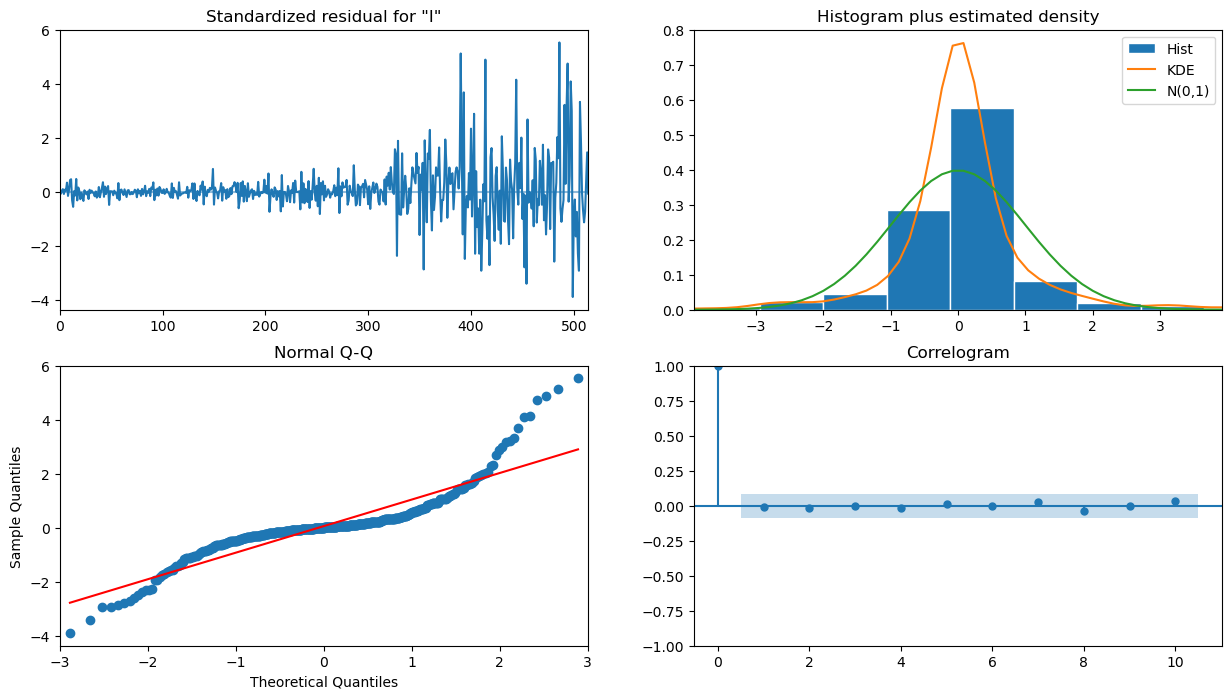

In [66]:
model = SARIMAX(train_diff,order = (5,0,10),simple_differencing = False)
model_fit = model.fit(disp=False)
model_fit.plot_diagnostics();

In [67]:
# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
residual = model_fit.resid
acorr_ljungbox(residual,np.arange(1,20,1))

lb_stat  lb_pvalue
1   0.056970   0.811351
2   0.196284   0.906520
3   0.198006   0.977910
4   0.318151   0.988613
5   0.407514   0.995120
6   0.421924   0.998663
7   0.786151   0.997583
8   1.397394   0.994283
9   1.398695   0.997831
10  2.091796   0.995587
11  4.026179   0.969145
12  5.328964   0.946079
13  5.873335   0.950641
14  6.180237   0.961742
15  6.273728   0.974774
16  6.373315   0.983538
17  7.179516   0.981103
18  8.265260   0.974421
19  8.316292   0.983196

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon

    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value

    elif method == 'arma':
        pred_arma = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(5,0,10))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_arma.extend(oos_pred)
        return pred_arma

In [69]:
train_len = len(train_diff)
horizon = len(test_diff)
window = 2

In [70]:
pred_mean = rolling_forecast(first_order_diff,train_len,horizon,window,'mean')
pred_last_value = rolling_forecast(first_order_diff,train_len,horizon,window,'last')
pred_arma = rolling_forecast(first_order_diff,train_len,horizon,window,'arma')

In [71]:
pred_df = test_diff.copy()
pred_df.loc[:,'pred_mean'] = pred_mean
pred_df.loc[:,'pred_lastvalue'] = pred_last_value
pred_df.loc[:,'pred_arma'] = pred_arma

In [72]:
# Can you see what we done here ?
# The ARMA is doing a great job predicting the gold prices .
# But its missing important information such as seasonal patterns of the time series data.
# Seasonal component is very important component when you  have years of time series data.
# Lets check the rmse value.
# Since there is 0 value present in the prediction we can't use mape.
# Later, lets reverse the differencing value to normal / original scale.

In [73]:
# Reverse the differencing

In [74]:
df1 = gold.copy()
df1['pred_gold_price_arma'] = pd.Series()
df1['pred_gold_price_last_value'] = pd.Series()
df1['pred_gold_price_mean'] = pd.Series()

In [75]:
df1['pred_gold_price_arma'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_arma'].cumsum()
df1['pred_gold_price_last_value'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_lastvalue'].cumsum()
df1['pred_gold_price_mean'][-12:] = df1['Indian rupee (INR)'].iloc[-12] + pred_df['pred_mean'].cumsum()

In [76]:
rmse(df1['Indian rupee (INR)'][-12:],df1['pred_gold_price_arma'][-12:])

198.1897314944183

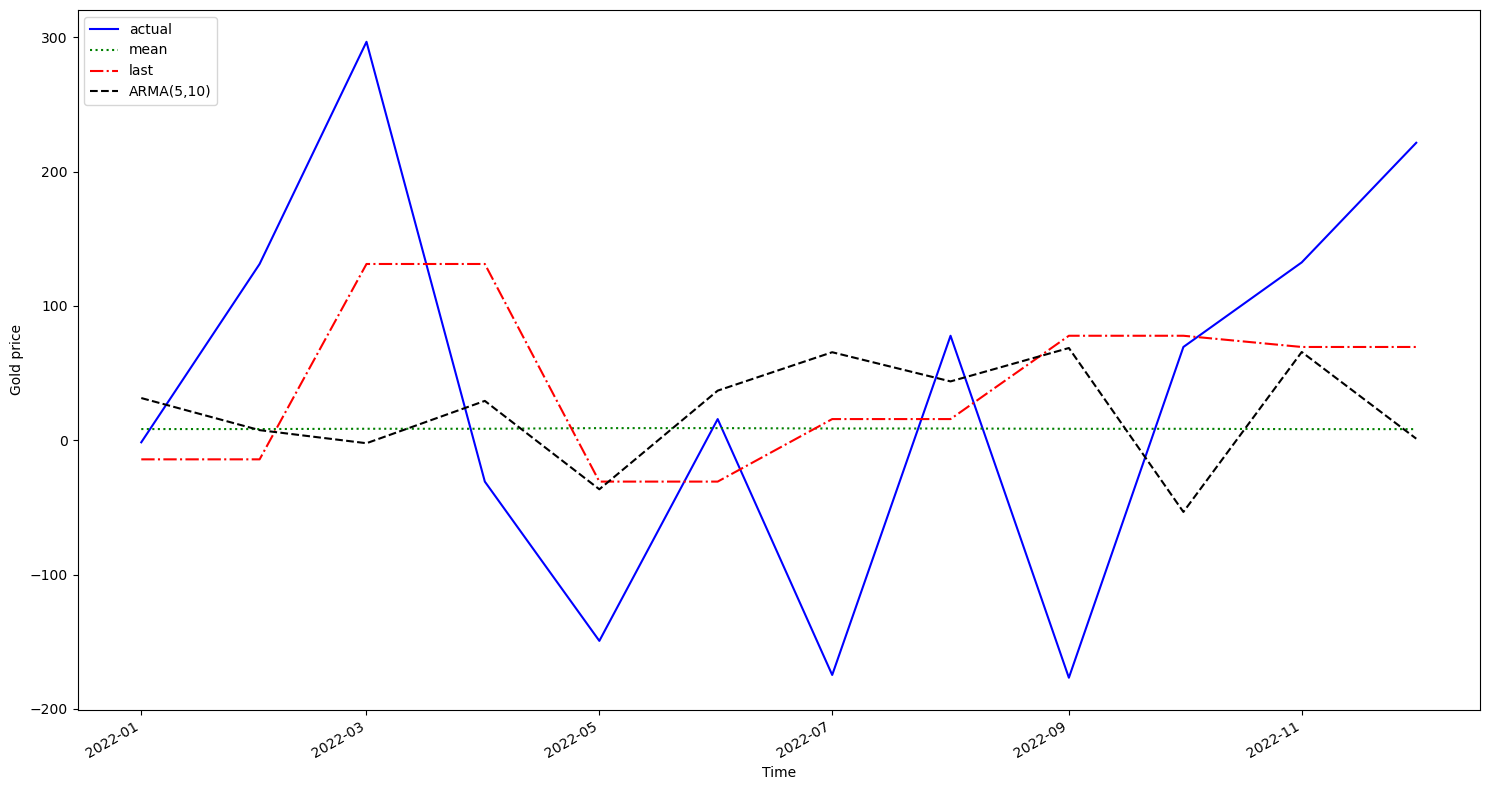

In [77]:
fig, ax = plt.subplots()
ax.plot(pred_df['INR'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_lastvalue'], 'r-.', label='last')
ax.plot(pred_df['pred_arma'], 'k--', label='ARMA(5,10)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

* Check the values of original / actual values and all the prediction values using mean, last value and arma techniques.
* To reverse the differencing the predicted values seems tedious job to do.But luckly , we have a method which takes the non stationary time series data and forecast values.

#  What's Next ???

* Now , we want to use statistical methods which **don't** have assumption about the stationary properties of a time series data.
* Also , we need to incorporate the **seasonality** of the time series data , which enhance the forecasting accuracy.

##  Welcome to SARIMA :

* **SARIMAX >>>** **Seasonal  Auto - Regressive  Integrated  Moving  Average - (p,d,q)(P,D,Q)m**

Defining SARIMA :

    * SARIMAX is a model expands on the ARIMA(p,d,q) by adding the seasonal parameters along with exogenous patterns.
    * You can see, there are four new parameter is introduced whereas the first three parameter (P,D,Q) is much similar to (p,d,q) but to understand these parameter , we must define what 'm' parameter is .
    * "m" is refers to the frequency of the time series data observed.Its the frequency of the data per cycle.A cycle is refers to a complete time period, for eg. Year
    * In a  year cycle, if we observed time series every month then m is 12 , if its every week then m  is 52, if its on quarter then m is 4 .
    * Let’s consider an example where m = 12. If P = 2, this means that we are including two past values of the series at a lag that is a multiple of m. Therefore, we’ll include the values at yt–12 and yt–24.

### Identifying Seasonal pattern :
 * There is no statistical test we can perform to find the seasonality of the time series data.
 * One way is to decompose the time series into different components such as observed,trend,seasonal and residual component.
 * Use statsmodels library to decompose the time series

In [78]:
from statsmodels.tsa.seasonal import STL

In [79]:
decomp = STL(gold['Indian rupee (INR)'],period = 12).fit()

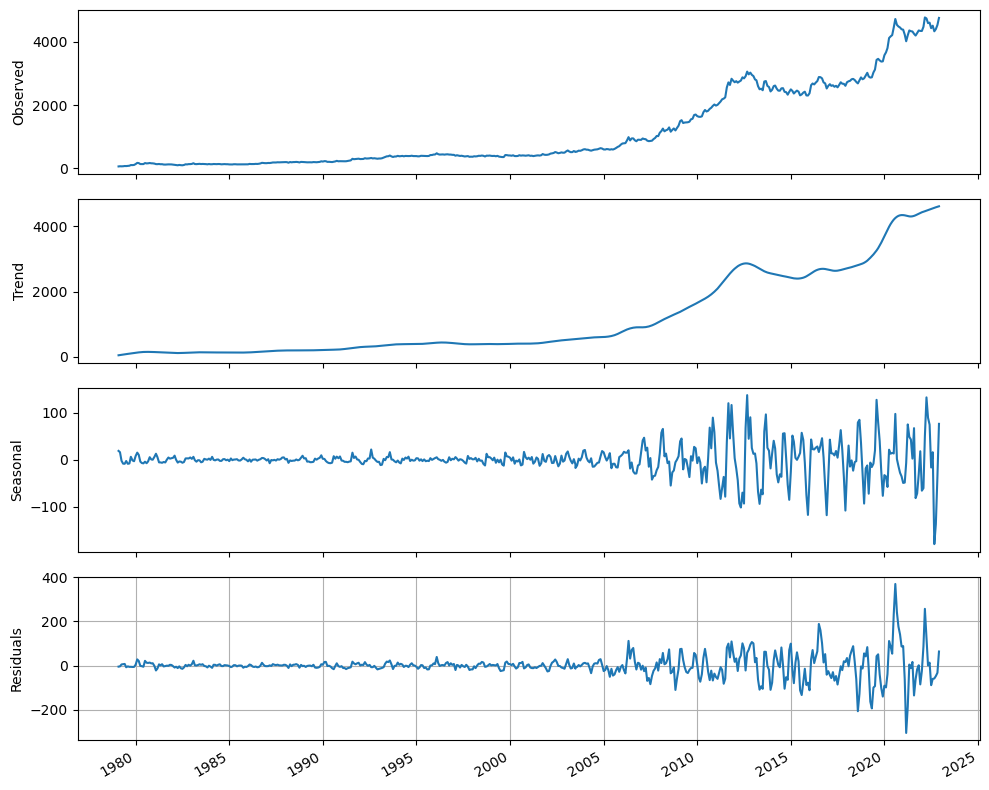

In [80]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))
ax1.plot(decomp.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomp.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomp.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomp.resid)
ax4.set_ylabel('Residuals')
fig.autofmt_xdate()
plt.tight_layout()
plt.grid()

In [81]:
# Its clear there is a yearly seasonal pattern occurs as well as quarter (or) monthly seasonal pattern  .
# So this might be multi-seasonality time series data.
# Its obvious now that this is a non-stationary data.

# Let's implement the SARIMAX:
    * We use the general procedure to find values for p,q , P,Q using AIC score.
    * Parameter d is the number of differencing order requires to transform the non - stationary time series data to stationary time series data.

In [82]:
# Finding values for p,q,P,Q using general procedure.
from itertools import product
p = range(0,5,1)
q = range(0,5,1)
P = range(0,5,1)
Q = range(0,5,1)
order_list = list(product(p,q,P,Q))
len(order_list)

625

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
# Lets calculate 'd':
adf_stats,pvalue,_,_,_,_ = adfuller(gold['Indian rupee (INR)'])
pvalue

0.9986625380810772

In [85]:
# We failed to reject the null hypothesis (Presence of unit root (Not Stationary))

In [86]:
# Apply differencing :
diff = np.diff(gold['Indian rupee (INR)'],n=1)
adf_stats,pvalue,_,_,_,_ = adfuller(diff)
pvalue

0.0010279073863517583

In [87]:
# We reject the null hypothesis (Presence of unit root (Not Stationary)) and state that our time series now is a stationary one.
# Since , we differenced our time series only one time , our d, D becomes
d = 1
D = 0 # because we haven't performed seasonal differencing , where n might become 365 (frequency).
s = 12 # frequency ( Monthly observed data)

In [88]:
train = gold['Indian rupee (INR)'][:-12]
test =  gold['Indian rupee (INR)'][-12:]

In [89]:
# Function to find the p,q values using aic criterion
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [90]:
def Optimize_Sarimax(endog : Union[pd.Series,list],
                    order_list : list,
                    d : int ,
                    D : int,
                    s : int):
    results = []
    for order in tqdm_notebook(order_list):
        try :
            model = SARIMAX(
            endog,order = (order[0],d,order[1]),
            seasonal_order=(order[2],D,order[3],s),
                simple_differencing = False).fit(disp=True)
        except :
            continue

        aic = model.aic
        results.append([order,model.aic])
    results_df = pd.DataFrame(results)
    results_df.columns = ['(p,q,P,Q)','AIC']
    results_df = results_df.sort_values(by = 'AIC').reset_index(drop=True)
    return results_df

In [91]:
# When you have a large data , ideally SARIMA would take a large time to fit.
# Due to the lack of computation resources , I can't able to try different number of orders for each parameter in SARIMA.
# Also when you have multi seasonality presence , then sarima or other statistical models we seen so far will failed to address it.
# Lack of study multi - seasonality pattern , now, the residuals will not possess white noise properties.

In [92]:
best_model = SARIMAX(train, order = (4,d,4),
                    seasonal_order = (2,0,1,s),simple_differencing = False)
best_model_fit = best_model.fit(disp=False)
print(best_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                   Indian rupee (INR)   No. Observations:                  516
Model:             SARIMAX(4, 1, 4)x(2, 0, [1], 12)   Log Likelihood               -2786.612
Date:                              Sun, 01 Oct 2023   AIC                           5597.223
Time:                                      12:12:22   BIC                           5648.153
Sample:                                           0   HQIC                          5617.183
                                              - 516                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6063      0.111      5.439      0.000       0.388       0.825
ar.L2         -0.40

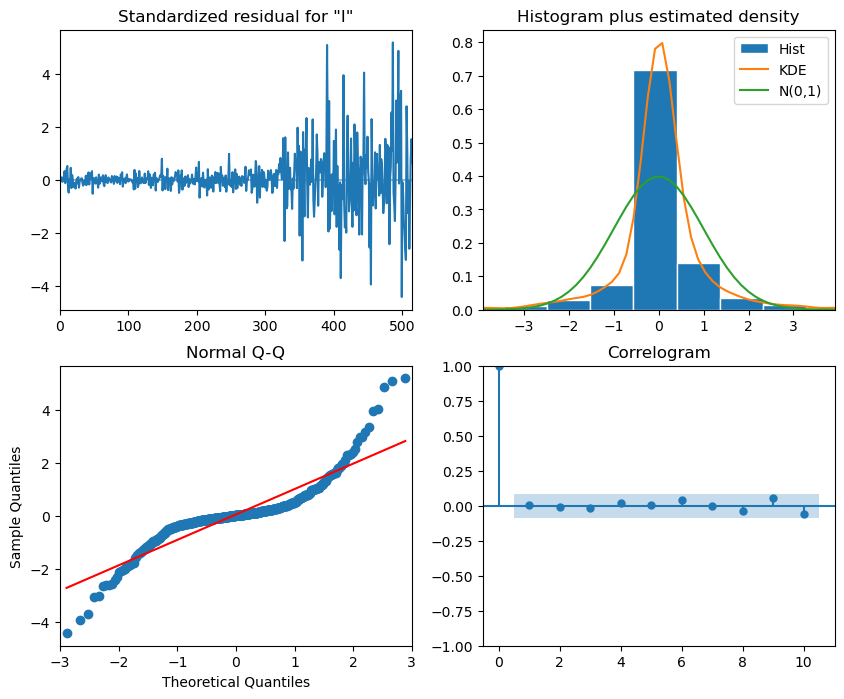

In [93]:
best_model_fit.plot_diagnostics(figsize=(10,8));

In [94]:
# lets do the statistical test
residuals = best_model_fit.resid
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals) # all values are greater than 0.05. so we conclude the residuals are uncorrelated and independent.

lb_stat  lb_pvalue
1   0.032939   0.855981
2   0.113773   0.944702
3   0.227678   0.973002
4   0.483203   0.975115
5   0.486698   0.992602
6   1.494504   0.959859
7   1.499189   0.982338
8   2.275542   0.971378
9   3.756192   0.926714
10  5.513018   0.854385

In [95]:
# We fit the model on the data from 1959 to the end of 2007.
pred_df = pd.DataFrame({'actual': test})

In [96]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

In [97]:
pred_sarima = best_model_fit.get_prediction(516,529).predicted_mean

In [98]:
df1['pred_gold_price_sarima'] = pd.Series()

In [99]:
df1['pred_gold_price_sarima'][516:] = pred_sarima[:-2]

In [100]:
df1

Indian rupee (INR)  pred_gold_price_arma  \
Date                                                   
1979-01-31           59.183737                   NaN   
1979-02-28           64.677014                   NaN   
1979-03-30           62.377592                   NaN   
1979-04-30           64.722668                   NaN   
1979-05-31           72.448814                   NaN   
...                        ...                   ...   
2022-08-01         4513.312158           4522.542966   
2022-09-01         4336.447686           4591.216395   
2022-10-01         4405.902944           4537.827214   
2022-11-01         4538.351160           4603.535563   
2022-12-01         4759.873018           4604.695656   

            pred_gold_price_last_value  pred_gold_price_mean  \
Date                                                           
1979-01-31                         NaN                   NaN   
1979-02-28                         NaN                   NaN   
1979-03-30                         NaN                   NaN   
1979-04-30                         NaN                   NaN   
1979-05-31                         NaN                   NaN   
...                                ...                   ...   
2022-08-01                 4550.767778           4416.046050   
2022-09-01                 4628.579015           4424.562548   
2022-10-01                 4706.390252           4433.079046   
2022-11-01                 4775.845509           4441.358511   
2022-12-01                 4845.300767           4449.637976   

            pred_gold_price_sarima  
Date                                
1979-01-31                     NaN  
1979-02-28                     NaN  
1979-03-30                     NaN  
1979-04-30                     NaN  
1979-05-31                     NaN  
...                            ...  
2022-08-01             4520.802064  
2022-09-01             4442.831446  
2022-10-01             4454.461678  
2022-11-01             4505.465559  
2022-12-01             4530.457399  

[528 rows x 5 columns]

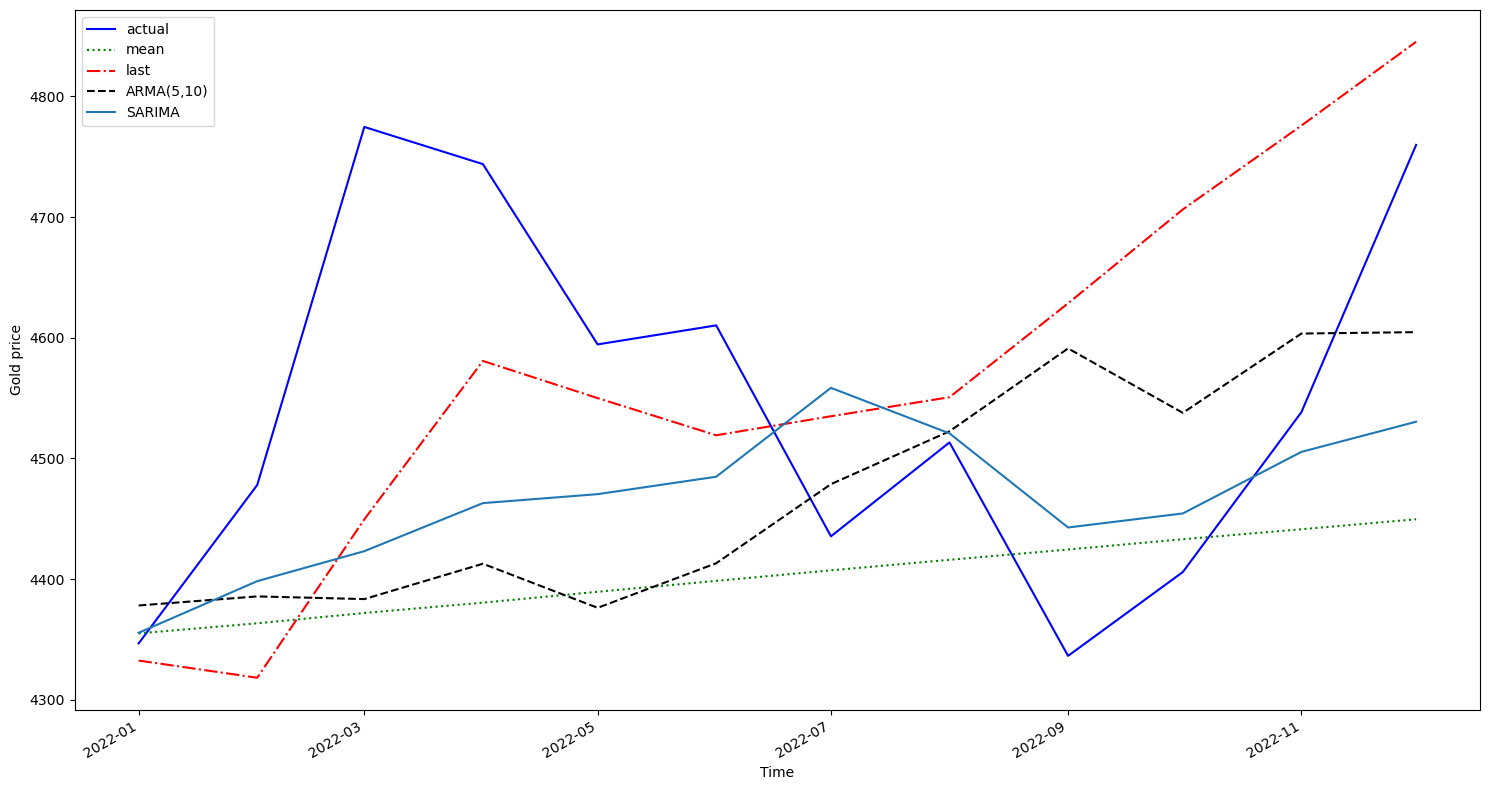

In [101]:
fig, ax = plt.subplots()
ax.plot(df1['Indian rupee (INR)'][516:], 'b-', label='actual')
ax.plot(df1['pred_gold_price_mean'][516:], 'g:', label='mean')
ax.plot(df1['pred_gold_price_last_value'][516:], 'r-.', label='last')
ax.plot(df1['pred_gold_price_arma'][516:], 'k--', label='ARMA(5,10)')
ax.plot(df1['pred_gold_price_sarima'][516:], label='SARIMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

In [102]:
rmse(df1['Indian rupee (INR)'][516:],df1['pred_gold_price_sarima'][516:])

163.9732481714672

## What's next is MACHINE LEARNING:
    * We witnessed that our statistical models are failing in a long marign to approximate our time series data.But this    where deep learnings architectures shine!!
    * Deep learning is a subset of machine learning field , which uses a high level neural network architecture to solves   any kind of problem just by adjusting its weights. Because of its flexibility deep learning models gained popularity.
    * Deep learning specifically have models which are used to process sequential data such as RNN and its several variants.
    * First , lets prepare our time series data for deep learning modela to process,
    * Encode the time information as numerical value using timestamp method from datetime library.
    * Next, we create a user defined function called data_window to create batches of sequential data along with labels     values which allows the deep learning models to learn.
    * Now we build baseline models along with rnn model and its variants.

In [103]:
NO_OF_LAG_DAYS = 2

In [104]:
def create_lag_feature(df,label,no_of_days):
    df = df.copy()
    for day in range(1, no_of_days+1):
        df[f"lag_{day}"] = df[label].shift(day)

    return df

In [105]:
df_features = create_lag_feature(gold,'Indian rupee (INR)',NO_OF_LAG_DAYS)

In [106]:
df_features

Indian rupee (INR)        lag_1        lag_2
Date                                                    
1979-01-31           59.183737          NaN          NaN
1979-02-28           64.677014    59.183737          NaN
1979-03-30           62.377592    64.677014    59.183737
1979-04-30           64.722668    62.377592    64.677014
1979-05-31           72.448814    64.722668    62.377592
...                        ...          ...          ...
2022-08-01         4513.312158  4435.500921  4610.298100
2022-09-01         4336.447686  4513.312158  4435.500921
2022-10-01         4405.902944  4336.447686  4513.312158
2022-11-01         4538.351160  4405.902944  4336.447686
2022-12-01         4759.873018  4538.351160  4405.902944

[528 rows x 3 columns]

In [107]:
lag_features =  [col for col in df_features.columns if "lag" in col]
print(lag_features)

['lag_1', 'lag_2']


In [108]:
df_lag_features = df_features[lag_features + ['Indian rupee (INR)']].dropna()
df_lag_features.columns

Index(['lag_1', 'lag_2', 'Indian rupee (INR)'], dtype='object')

In [109]:
df_lag_features

lag_1        lag_2  Indian rupee (INR)
Date                                                    
1979-03-30    64.677014    59.183737           62.377592
1979-04-30    62.377592    64.677014           64.722668
1979-05-31    64.722668    62.377592           72.448814
1979-06-29    72.448814    64.722668           70.427818
1979-07-31    70.427818    72.448814           75.687359
...                 ...          ...                 ...
2022-08-01  4435.500921  4610.298100         4513.312158
2022-09-01  4513.312158  4435.500921         4336.447686
2022-10-01  4336.447686  4513.312158         4405.902944
2022-11-01  4405.902944  4336.447686         4538.351160
2022-12-01  4538.351160  4405.902944         4759.873018

[526 rows x 3 columns]

In [110]:
train = df_lag_features[:372]
val = df_lag_features[372:-24]
test = df_lag_features[-24:]

In [111]:
X_train_df = train[lag_features]
X_val_df = val[lag_features]
X_test_df = test[lag_features]

### Feature Scaling :

* We'll use Min - Max Scaler from scikit-learn to scale our data.
* Scaling the features to a range between 0-1
* Scaling features helps the model to give equal importance to alll features and also faster convergence.
* Note we fit the scaler on traning data and use it to transform the test and val data to avoid data leakage.

In [112]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [113]:
min_max_scaler.fit(X_train_df)

MinMaxScaler()

In [114]:
X_train = min_max_scaler.transform(X_train_df)
X_val = min_max_scaler.transform(X_val_df)
X_test = min_max_scaler.transform(X_test_df)

In [115]:
train.shape

(372, 3)

In [116]:
val.shape

(130, 3)

In [117]:
test.shape

(24, 3)

In [202]:
train.corr()

lag_1     lag_2  Indian rupee (INR)
lag_1               1.000000  0.997286            0.997353
lag_2               0.997286  1.000000            0.995051
Indian rupee (INR)  0.997353  0.995051            1.000000

In [119]:
# Since there is a correlation between each features and target variable , we can try the linear regression

In [120]:
# Created a dictionary called 'performance' to store all the models predictability for the given data.
performance = {}

### Linear regression :

In [121]:
lr = LinearRegression()
model = lr.fit(X_train,train['Indian rupee (INR)'])

In [122]:
predict = model.predict(X_val)

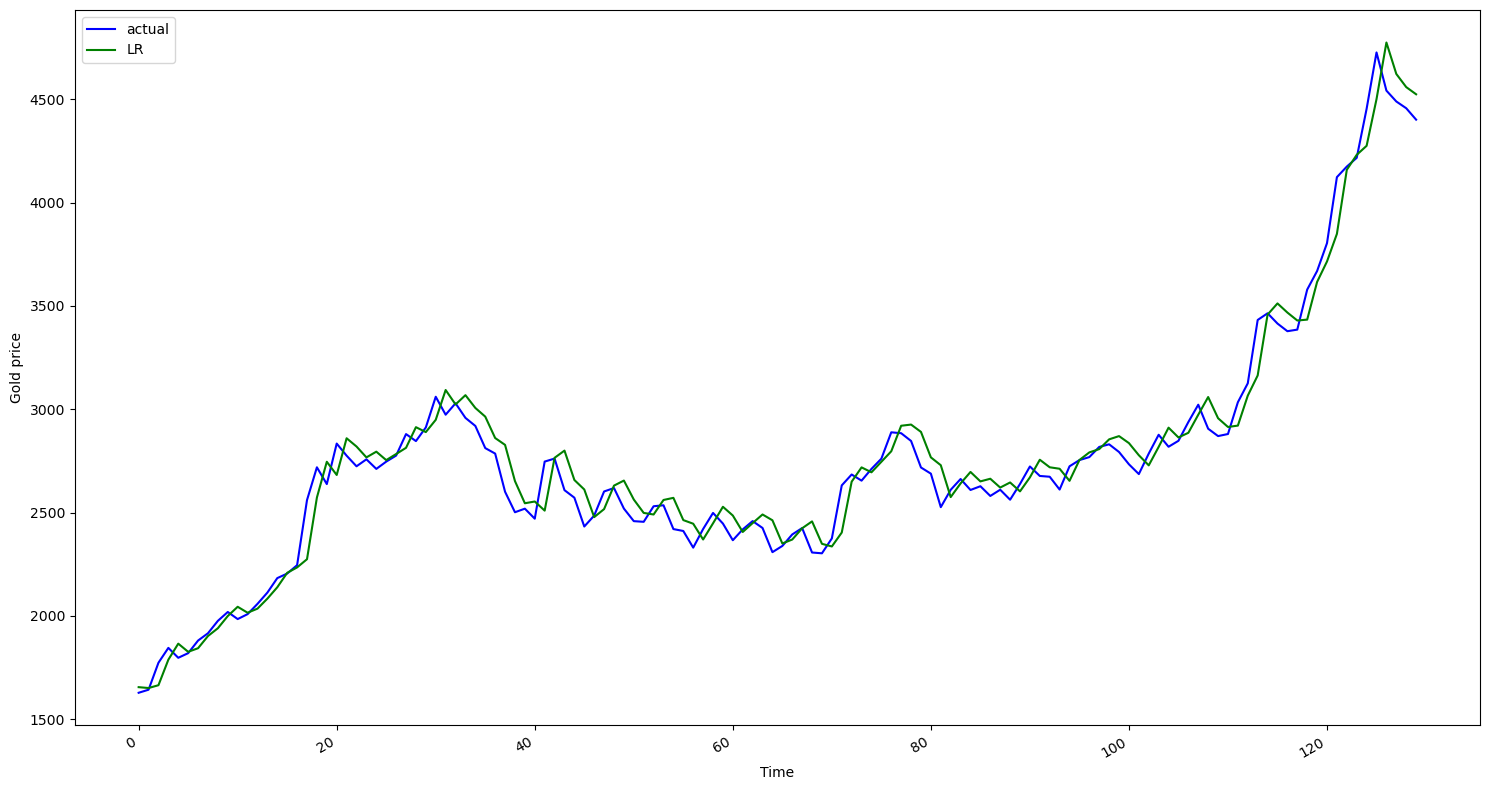

In [123]:
fig, ax = plt.subplots()
ax.plot(val['Indian rupee (INR)'].values, 'b-', label='actual')
ax.plot(predict, 'g', label='LR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

In [124]:
performance['Linear Regression'] = rmse(val['Indian rupee (INR)'],predict)
performance['Linear Regression']

101.09560081756605

In [205]:
# The rmse value of 101 tells us that the prediction masde by linear regression are off by ± 101.
# For example , if the prediction is 601 , then the original value might lies between 500 - 702.

## Implementing a linear model :

* A linear model is the simplest architecture we can implement in deep learning.
* In fact, we might argue that it is not deep learning at all, since the model has no hidden layer.
* Each input feature is simply given a weight, and they are combined to output a prediction for the target, just like in a traditional linear regression.
* We simply take each input, assigns weights to it , take the sum and generate the predictions.

In [126]:
Linear_model = Sequential()
Linear_model.add(Dense(units = 1,activation = 'linear'))
Linear_model.compile(loss = MeanSquaredError(),metrics = [RootMeanSquaredError()])

In [127]:
Linear_model.fit(X_train,train['Indian rupee (INR)'],epochs = 100)

Epoch 1/100
12/12 [==============================] - 2s 6ms/step - loss: 290658.4062 - root_mean_squared_error: 539.1274
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 290636.6562 - root_mean_squared_error: 539.1073
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 290618.3125 - root_mean_squared_error: 539.0903
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 290600.8750 - root_mean_squared_error: 539.0741
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 290583.6250 - root_mean_squared_error: 539.0581
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 290566.7812 - root_mean_squared_error: 539.0425
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 290549.4688 - root_mean_squared_error: 539.0264
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 290532.0625 - root_mean_squared_error: 539.0103
Epoch 9/100
12/12 [=============

In [128]:
predict = Linear_model.predict(X_val)

5/5 [==============================] - 0s 4ms/step


In [129]:
performance['Linear model'] = rmse(val['Indian rupee (INR)'].values,predict)
performance['Linear model']

2801.841893266019

In [130]:
performance

{'Linear Regression': 101.09560081756605, 'Linear model': 2801.841893266019}

In [131]:
# The above model is overfitting the data.
# The reason might be due to the low volume of data used .
# Clearly we can see that the training data is overfitting .
# We now take some measures to deal with over fitting problem.
# 0. Reduce the number of epochs or use early stopping stop training once the model performance stops improving on a hold out validation dataset.
# 1. Reduce the size of the neural network or atleat reduce the size of the number of neurons in the hidden layer.
# 2. Add Dropout layers,which randomly shutoffs a certain percentage of neuron in that hidden layer.
# 3. Add regularization which adds a cost to loss function for larger weights.
# 4. Reducing the number of parameter to train the model should be reduced as well.

### Dense Neural Network :

In [132]:
model = Sequential()
model.add(Dense(units = 64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1,activation = 'linear'))
model.compile(loss = MeanSquaredError(),metrics = [RootMeanSquaredError()])

In [133]:
model.fit(X_train,train['Indian rupee (INR)'],epochs = 100)

Epoch 1/100
12/12 [==============================] - 2s 6ms/step - loss: 291043.5938 - root_mean_squared_error: 539.4846
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 290572.0000 - root_mean_squared_error: 539.0473
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 289979.0000 - root_mean_squared_error: 538.4970
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 289222.6562 - root_mean_squared_error: 537.7943
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 288192.6875 - root_mean_squared_error: 536.8358
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 286836.7500 - root_mean_squared_error: 535.5714
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 285394.5312 - root_mean_squared_error: 534.2233
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 283398.7812 - root_mean_squared_error: 532.3521
Epoch 9/100
12/12 [=============

In [134]:
predict = model.predict(X_val)

5/5 [==============================] - 0s 4ms/step


In [135]:
performance['Dense Neural Network'] = rmse(val['Indian rupee (INR)'],predict)
performance['Dense Neural Network']

174.05197257227115

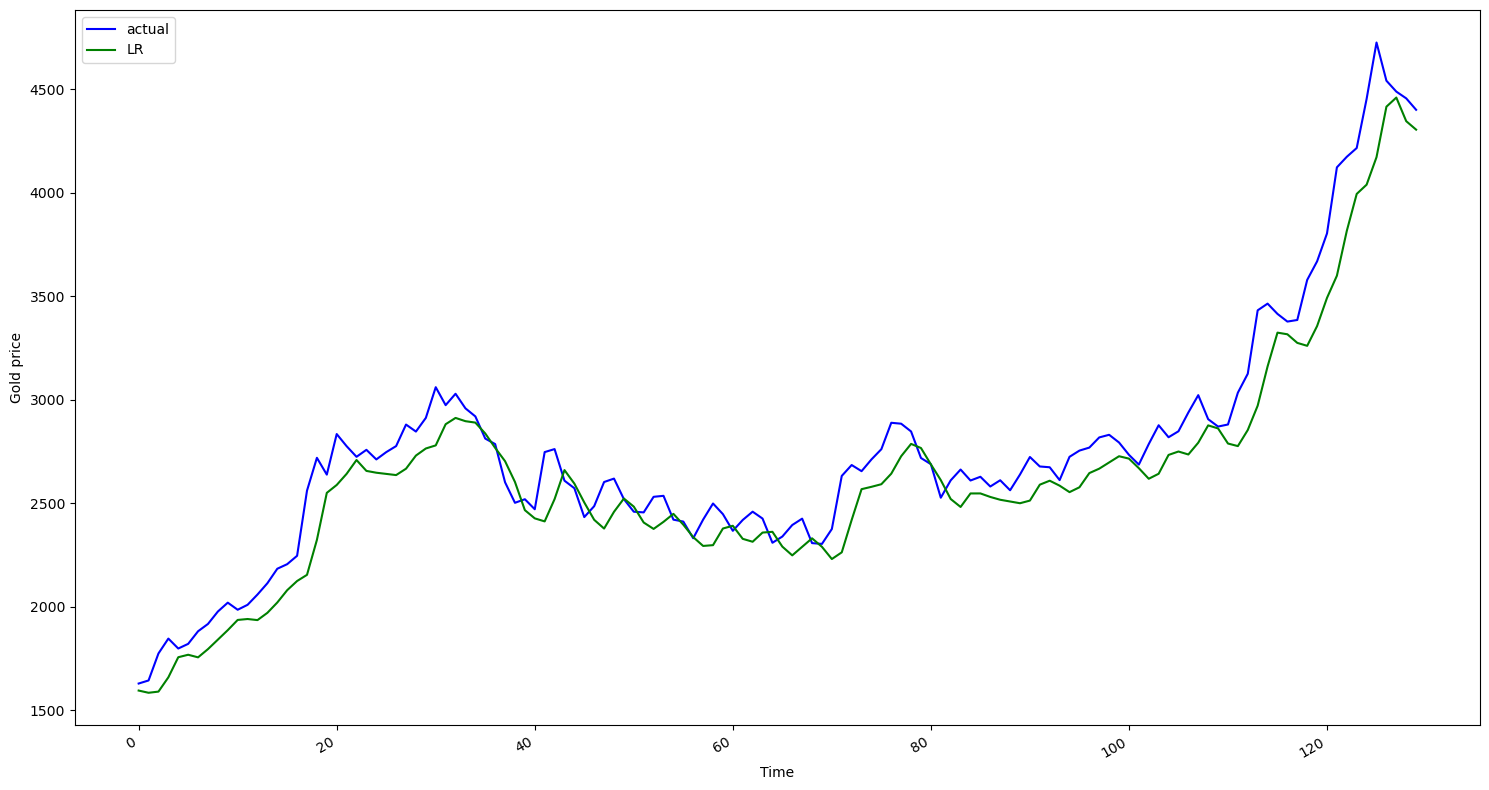

In [136]:
fig, ax = plt.subplots()
ax.plot(val['Indian rupee (INR)'].values, 'b-', label='actual')
ax.plot(predict, 'g', label='LR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

In [137]:
# The above plot shows that the ANN neural network captured the trend of the gold price.
# But failed to capture the seasonality over the time.
# Let's build more sophisticated models using rnn ,lstm,bi-directional etc.

### RNN :

In [138]:
n_timesteps = X_train.shape[1]
n_features = 1

In [139]:
callback = EarlyStopping(monitor= 'loss',mode = 'min',patience = 3)

In [140]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units = 64,activation = 'relu',input_shape = (n_timesteps,n_features)))
model.add(Dropout(0.25))
RNN_model.add(Dense(units = 64,activation = 'relu'))
model.add(Dropout(0.25))
RNN_model.add(Dense(units = 1,activation = 'linear'))
RNN_model.compile(loss = MeanSquaredError(),metrics = [RootMeanSquaredError()])

In [141]:
RNN_model.fit(X_train,train['Indian rupee (INR)'],epochs = 100,callbacks = [callback])

Epoch 1/100
12/12 [==============================] - 3s 7ms/step - loss: 291011.9062 - root_mean_squared_error: 539.4552
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 290265.9062 - root_mean_squared_error: 538.7633
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 288968.6875 - root_mean_squared_error: 537.5581
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 286889.7500 - root_mean_squared_error: 535.6209
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 283782.0312 - root_mean_squared_error: 532.7120
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 279249.1250 - root_mean_squared_error: 528.4402
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 273562.0938 - root_mean_squared_error: 523.0316
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 266199.8125 - root_mean_squared_error: 515.9456
Epoch 9/100
12/12 [=============

In [142]:
predict = RNN_model.predict(X_val)

5/5 [==============================] - 1s 4ms/step


In [143]:
performance['RNN'] = rmse(val['Indian rupee (INR)'],predict)
performance['RNN']

99.63149637715695

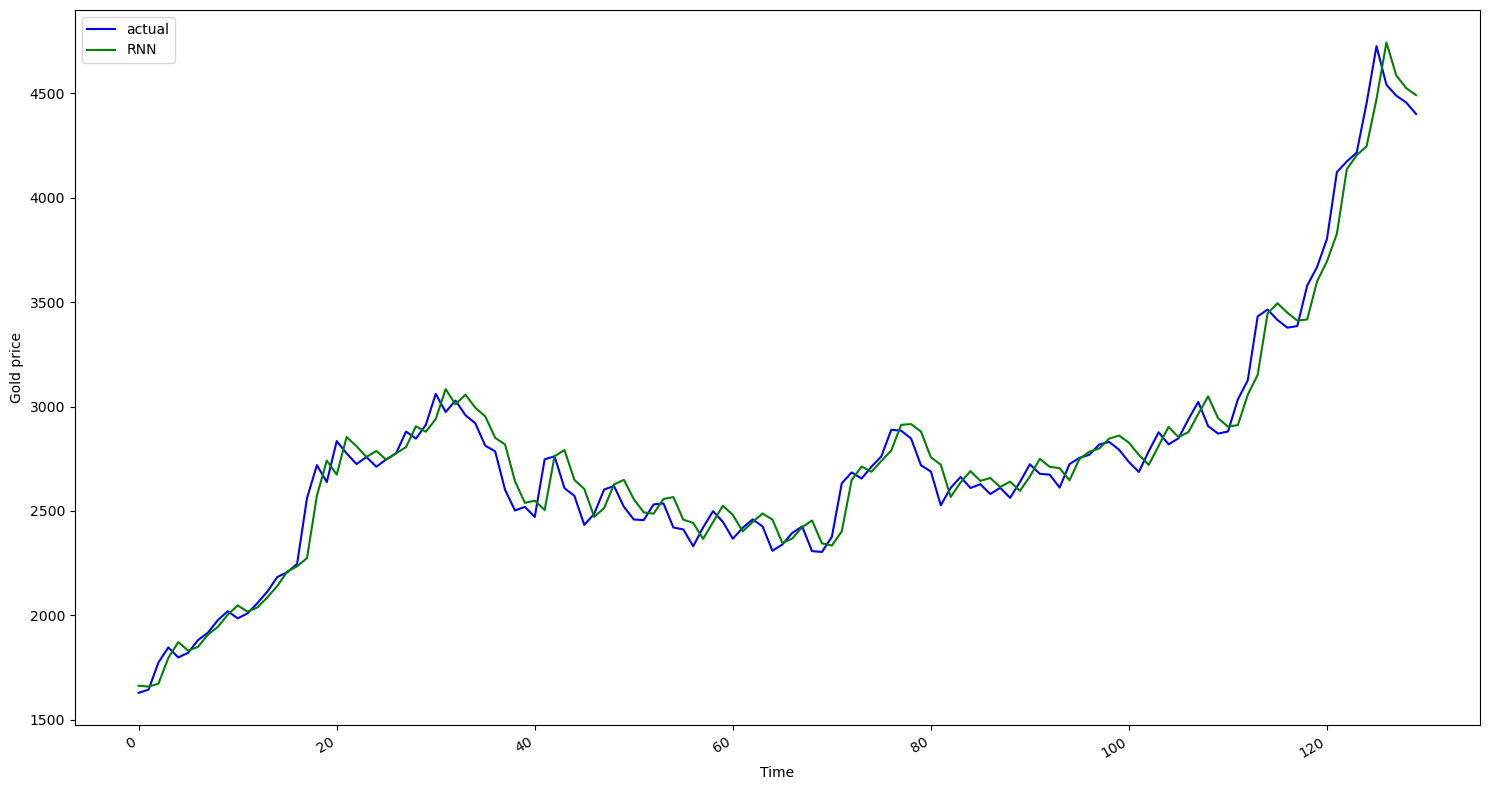

In [144]:
fig, ax = plt.subplots()
ax.plot(val['Indian rupee (INR)'].values, 'b-', label='actual')
ax.plot(predict, 'g', label='RNN')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

In [145]:
# We can see that the model learnt more about the trends as well as seasonality.
# What if we use LSTM model which dont have the vanishing gradient and long dependency problem.

### LSTM :

In [146]:
X_train_ = train[lag_features].values.reshape(train.shape[0],len(lag_features),1)
X_val_ = val[lag_features].values.reshape(val.shape[0],len(lag_features),1)
X_test_ = test[lag_features].values.reshape(test.shape[0],len(lag_features),1)
y_train_ = train['Indian rupee (INR)']
y_val_ = val['Indian rupee (INR)']
y_test_ = test['Indian rupee (INR)']

In [147]:
clear_session()

In [148]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units = 64,activation = 'relu',input_shape = (n_timesteps,n_features)))
LSTM_model.add(Dropout(0.25))
LSTM_model.add(Dense(units = 64,activation = 'relu'))
LSTM_model.add(Dropout(0.25))
LSTM_model.add(Dense(units = 1,activation = 'linear'))
LSTM_model.compile(loss = MeanSquaredError(),metrics = [RootMeanSquaredError()])
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21121 (82.50 KB)
Trainable params: 21121 (82.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
LSTM_model.fit(X_train_,y_train_,epochs = 100,callbacks = [callback])

Epoch 1/100
12/12 [==============================] - 5s 11ms/step - loss: 186134.4531 - root_mean_squared_error: 431.4330
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 33143.2461 - root_mean_squared_error: 182.0529
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 17184.5488 - root_mean_squared_error: 131.0898
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 16437.1953 - root_mean_squared_error: 128.2076
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 12809.4326 - root_mean_squared_error: 113.1788
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 11813.2148 - root_mean_squared_error: 108.6886
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 14089.4150 - root_mean_squared_error: 118.6988
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 11393.1416 - root_mean_squared_error: 106.7387
Epoch 9/100
12/12 [==============

In [150]:
predict = LSTM_model.predict(X_val_)

5/5 [==============================] - 1s 8ms/step


In [151]:
performance['LSTM'] = rmse(y_val_,predict.flatten())
performance['LSTM']

295.99054639983564

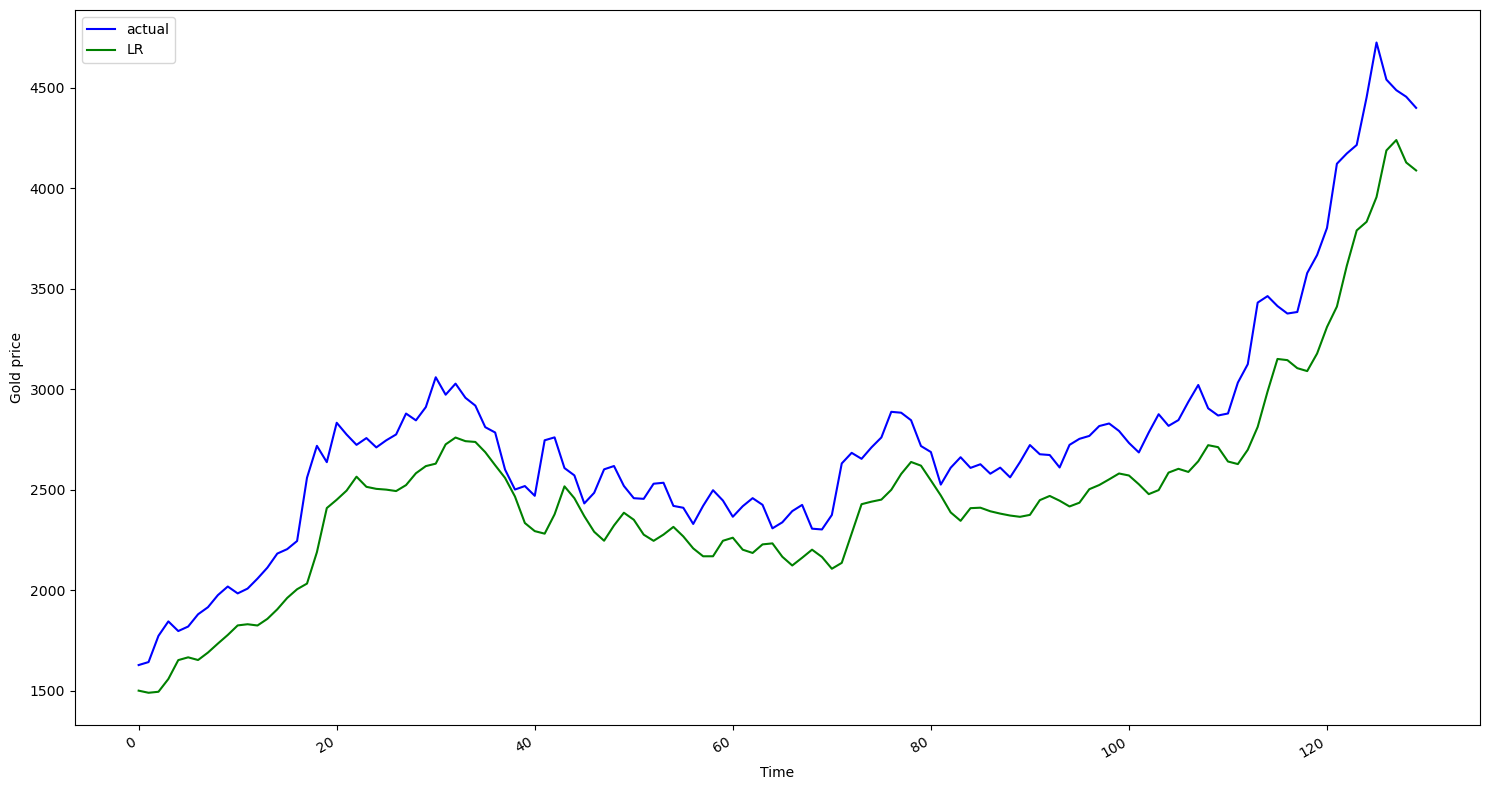

In [152]:
fig, ax = plt.subplots()
ax.plot(val['Indian rupee (INR)'].values, 'b-', label='actual')
ax.plot(predict, 'g', label='LR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
# Its obvious that LSTM model is overfitting the training data .
# Much complex like Lstm bound to overfit the data if the dtaa volume is much lower.

### Bi-directional RNN :

In [153]:
clear_session()

In [154]:
bi_rnn_model = Sequential()
bi_rnn_model.add(Bidirectional(SimpleRNN(units = 64,activation = 'relu',input_shape = (n_timesteps,n_features))))
bi_rnn_model.add(Dropout(0.25))
bi_rnn_model.add(Dense(units = 64,activation = 'relu'))
bi_rnn_model.add(Dropout(0.25))
bi_rnn_model.add(Dense(units = 1,activation = 'linear'))
bi_rnn_model.compile(loss = MeanSquaredError(),metrics = [RootMeanSquaredError()])
bi_rnn_model.fit(X_train_,y_train_,epochs = 100,callbacks = [callback])

Epoch 1/100
12/12 [==============================] - 7s 10ms/step - loss: 63264.7539 - root_mean_squared_error: 251.5249
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 14176.2607 - root_mean_squared_error: 119.0641
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 10904.7783 - root_mean_squared_error: 104.4259
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 12055.8643 - root_mean_squared_error: 109.7992
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 12336.3506 - root_mean_squared_error: 111.0691
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 10510.2100 - root_mean_squared_error: 102.5193
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 8960.3154 - root_mean_squared_error: 94.6589
Epoch 8/100
12/12 [==============================] - 0s 10ms/step - loss: 9742.5039 - root_mean_squared_error: 98.7041
Epoch 9/100
12/12 [=====================

In [155]:
prediction = bi_rnn_model.predict(X_val_)

5/5 [==============================] - 1s 4ms/step


In [156]:
performance['Bi-RNN'] = rmse(y_val_,prediction)
performance['Bi-RNN']

127.96737939648104

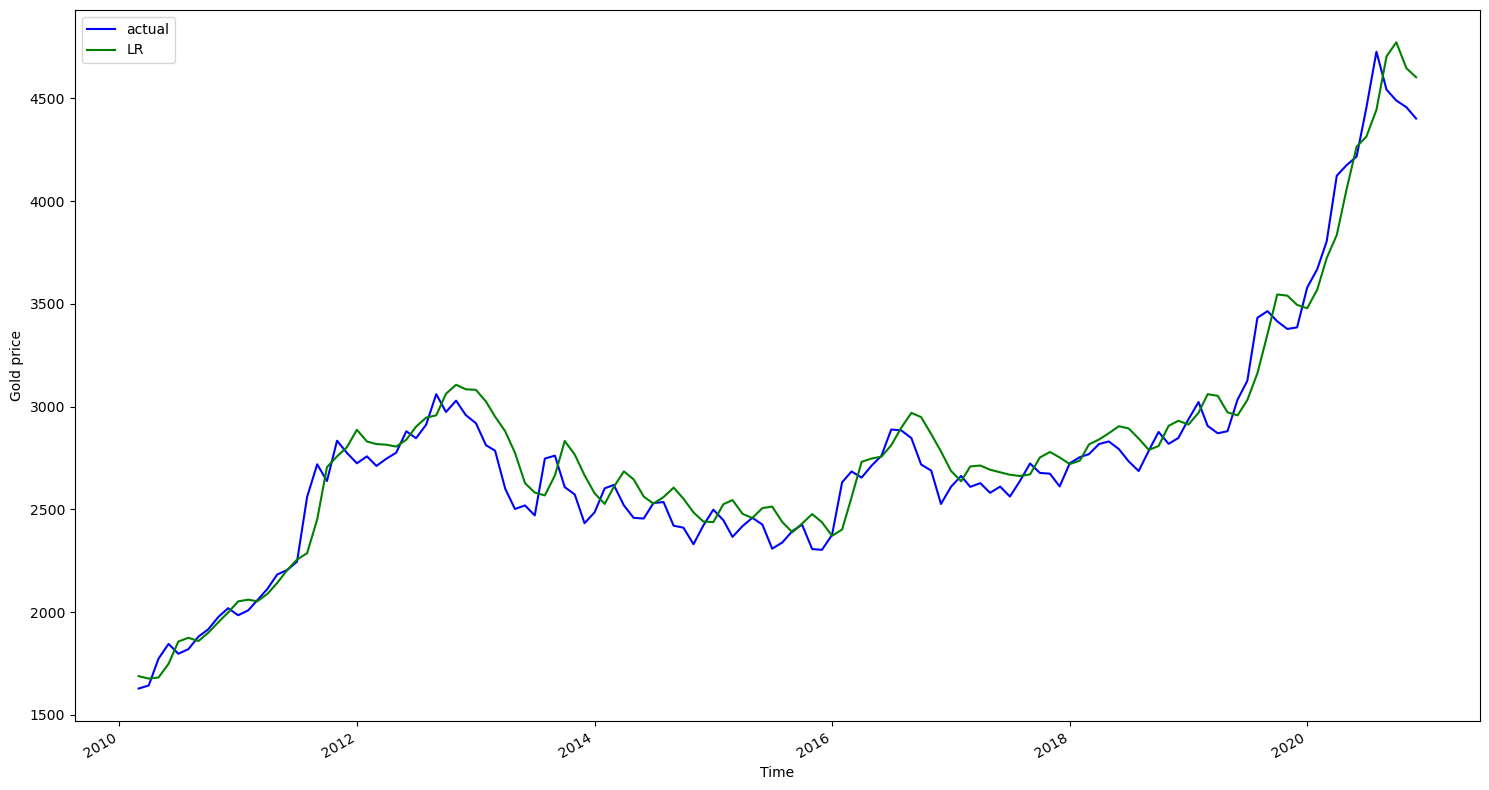

In [157]:
fig, ax = plt.subplots()
ax.plot(val['Indian rupee (INR)'], 'b-', label='actual')
ax.plot(val['Indian rupee (INR)'].index,prediction.flatten(), 'g', label='LR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

### Bi-directional LSTM :

In [158]:
clear_session()

In [159]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(units = 32,activation = 'relu',input_shape = (n_timesteps,n_features))))
bi_lstm_model.add(Dropout(0.25))
bi_lstm_model.add(Dense(units = 64,activation = 'relu'))
bi_lstm_model.add(Dropout(0.25))
bi_lstm_model.add(Dense(units = 1,activation = 'linear'))
bi_lstm_model.compile(loss = MeanSquaredError(),metrics = [RootMeanSquaredError()])
bi_lstm_model.fit(X_train_,y_train_,epochs = 100,callbacks = [callback])

Epoch 1/100
12/12 [==============================] - 10s 10ms/step - loss: 261266.7031 - root_mean_squared_error: 511.1425
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 107815.4375 - root_mean_squared_error: 328.3526
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 32848.3438 - root_mean_squared_error: 181.2411
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 26506.5078 - root_mean_squared_error: 162.8082
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 23300.9355 - root_mean_squared_error: 152.6464
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 24962.5488 - root_mean_squared_error: 157.9954
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 15573.2891 - root_mean_squared_error: 124.7930
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 15063.6602 - root_mean_squared_error: 122.7341
Epoch 9/100
12/12 [============

In [160]:
prediction = bi_lstm_model.predict(X_val_)

5/5 [==============================] - 1s 4ms/step


In [161]:
performance['Bi-LSTM'] = rmse(y_val_,prediction)
performance['Bi-LSTM']

227.4417606768719

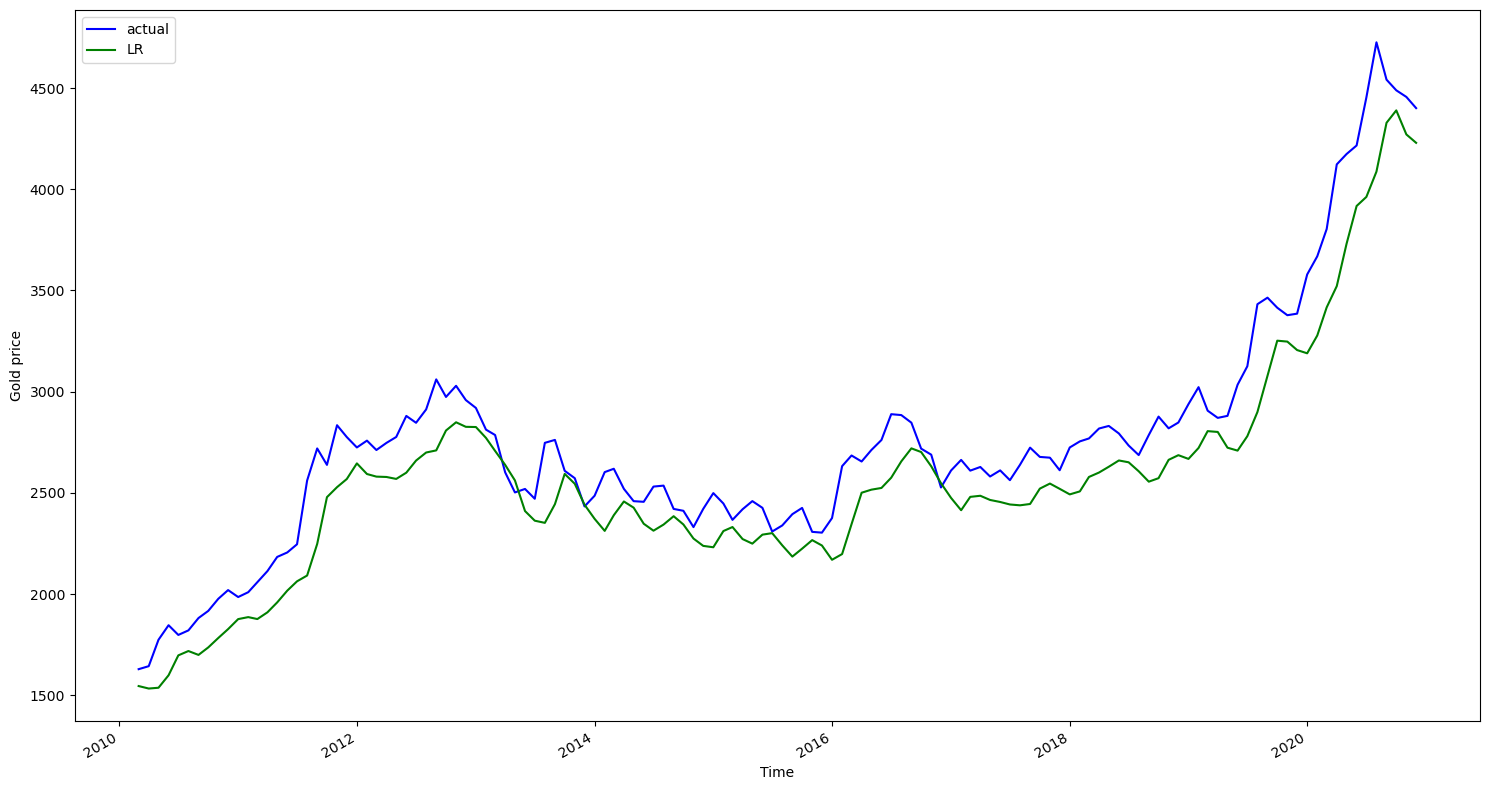

In [162]:
fig, ax = plt.subplots()
ax.plot(val['Indian rupee (INR)'], 'b-', label='actual')
ax.plot(val['Indian rupee (INR)'].index,prediction.flatten(), 'g', label='LR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Gold price')
fig.autofmt_xdate()
plt.tight_layout()

### Comparison B/W Models :

In [163]:
rmse_val = [v for v in performance.values()]
x = np.arange(len(performance))

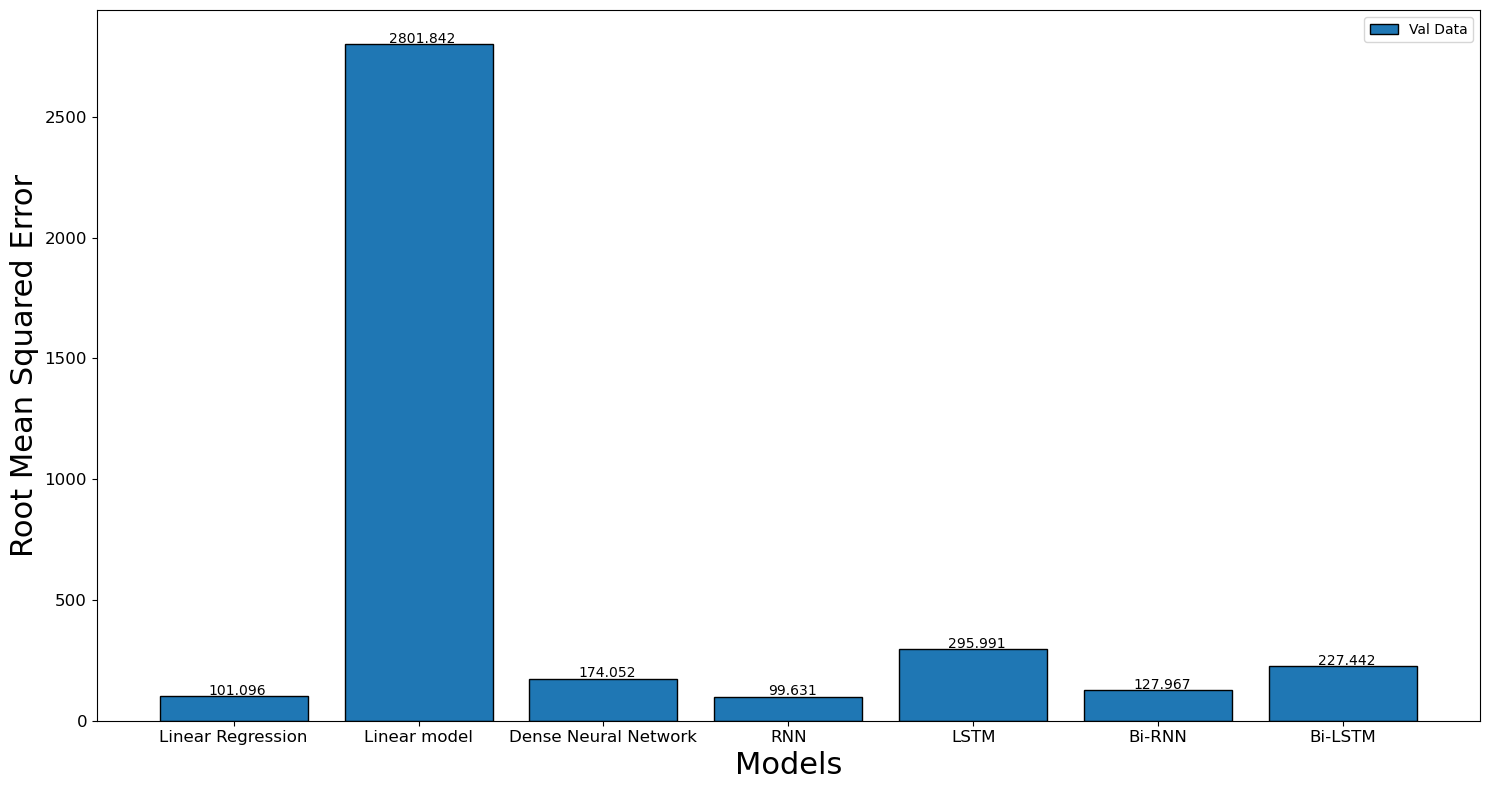

In [164]:
fig, ax = plt.subplots()
ax.bar(x , rmse_val, edgecolor='black', label='Val Data')
ax.set_ylabel('Root Mean Squared Error',fontsize= 22)
ax.set_xlabel('Models',fontsize= 22)
for index, value in enumerate(rmse_val):
    plt.text(x=index + 0.02, y=value+5.0, s=str(round(value, 3)),ha='center')
plt.xticks(ticks=x, labels=performance.keys(),fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(loc='best')
plt.tight_layout()

In [165]:
# From the above its clear that the RNN performed much more better and efficient than the other algorithms.
# This is more intuitive because the simple RNN is studies the sequential data much better than the other algorithms.
# Also, its less complex than LSTM model to overfit the train data.

# Forecasting :

In [178]:
import requests

In [179]:
# Extracting gold price of this year from the index_mundi website using request library from python.
url = 'https://www.indexmundi.com/commodities/?commodity=gold&months=240&currency=inr'
response = requests.get(url)
html_content = response.text
tables = pd.read_html(html_content)

In [180]:
# Segregating the gold price of 2023 year.
price_23 = tables[1][-6:] 
price_23.head()

Month     Price  Change
233  Jan 2023  155401.5   4.97%
234  Feb 2023  153192.9  -1.42%
235  Mar 2023  157403.0   2.75%
236  Apr 2023  164022.7   4.21%
237  May 2023  164018.0   0.00%

##### Note : Gold prices are present in the form of per Ounce (which is 31.1 grams).

In [181]:
# Gold price is converted into per gram
price_23['Price']  =  price_23['Price'] / 31.1

In [182]:
# Creating a new dataframe for the 2023 monthly gold price
new_Df = pd.DataFrame(data ={'Indian rupee (INR)':price_23['Price'][-6:].values}, index = pd.date_range('2023-01-01','2023-07-01',freq = 'M'))

In [183]:
# Concating 2023 gold price to gold dataframe.
df_1 = pd.concat([gold,new_Df])

In [201]:
df_1.tail()

Indian rupee (INR)
2023-02-28         4925.816720
2023-03-31         5061.189711
2023-04-30         5274.041801
2023-05-31         5273.890675
2023-06-30         5138.389068

# Forecast :

In [ ]:
# Forecast value for the next months using past months price as a independent variable.
# Creating a for loop to forecast the value for a month and later store that forecast to 's' , so that we can use that forecast 
# as a independent variable to forecast the next upcoming months.

In [198]:
number_of_months = 6
s = create_lag_feature(df_1[-3:],'Indian rupee (INR)',1).dropna().values.tolist()
for i in range(number_of_months):
    value = s[-1]
    x = min_max_scaler.transform([value])
    d = RNN_model.predict(x).flatten().tolist()
    d.append(s[-1][0])
    s.append(d)

1/1 [==============================] - 0s 76ms/step


In [199]:
# Gold Price for next 6 months :
forecast = pd.DataFrame(data = {'Y_hat(Lower_Bound)':(np.array(s)[:,0][-6:] - (1.96 * df_1.std() / np.sqrt(df_1.shape[0])).values[0]),
                                'Indian rupee (INR)':np.array(s)[:,0][-6:],
                                'Y_hat(Upper_Bound)':(np.array(s)[:,0][-6:] + (1.96 * df_1.std() / np.sqrt(df_1.shape[0])).values[0])},
                   index = pd.date_range('2023-07-01','2024-01-01',freq = 'M'))

forecast

Y_hat(Lower_Bound)  Indian rupee (INR)  Y_hat(Upper_Bound)
2023-07-31         5066.334799         5180.663574         5294.992350
2023-08-31         5098.202963         5212.531738         5326.860514
2023-09-30         5130.727377         5245.056152         5359.384928
2023-10-31         5163.257650         5277.586426         5391.915201
2023-11-30         5195.830892         5310.159668         5424.488444
2023-12-31         5228.446127         5342.774902         5457.103678

##  Summary :

**Factors Influencing Gold Price:**
Our analysis of the gold price time series data, which is recorded on a monthly basis, has highlighted its susceptibility to various influential factors. However, it's important to note that there is a range of influencing factors for which we lack available data.

**Naive Forecasting with Random Walk:**
Generally, time series data of this nature tends to be approximated well by a simple random walk, which often results in a naive forecast. Interestingly, many of the basic and uncomplicated forecast methods outperformed more complex and deep learning models.

**Success of Statistical Models:**
Employing several statistical models led to promising outcomes. These models demonstrated proficiency, although certain ones struggled due to the presence of random fluctuations and a limited presence of discernible seasonal patterns.

**Observation of Residuals in Seasonal Decomposition:**
Notably, a comprehensive examination of the residuals in the seasonal decomposition plot reveals an increasing degree of fluctuation, particularly in recent years. This pattern of fluctuation has implications for model performance.

**Venturing into Deep Learning Models:**
Our journey then took us into the realm of deep learning models. Initially, we implemented a Linear Regression, which yielded a commendable Root Mean Squared Error (RMSE) value. Encouraged by this outcome, we ventured into experimenting with more intricate models.

**Challenges Faced by Deep Learning Models:**
However, the deep learning models encountered challenges. Their effectiveness was hindered by two main factors. Firstly, the dataset's volume was exceedingly low. Deep learning typically thrives with substantial datasets. Secondly, the inherent pattern in the time series data was predominantly characterized by random upward and downward fluctuations, making it difficult for the models to discern meaningful trends.

**Selection of RNN Model:**
Ultimately, the RNN model, which consistently achieved the lowest RMSE value, was chosen to forecast the gold price for the upcoming six months.
    
**Room to Improve :**
Due to low computation source , I can't able to test more different combination of order values (p,q,P,Q).
The volume of the data is much low. So next time , it would be better if I choose the more high frequency data .
Increase the volume of the data , so that much sophisticated deep learning model will not overfit and yield good results.